In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import warnings
import plotly.express as px
from statistics import mean

#Transformar los caracteres
#import unicodedata 

In C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#Lectura del dataset 

path=   'C:/Users/agosm/Documents/tp_final/'

#se lee el dataset ya con la columna Key con los caracteres transformados

data = pd.read_csv(path + 'dataset_clear.csv',skipfooter=0, engine='python') 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45056 entries, 0 to 45055
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ExecutionId       44793 non-null  float64
 1   Interfaz          12014 non-null  float64
 2   CycleName         45056 non-null  object 
 3   Issue Key         45056 non-null  object 
 4   Test Summary      45056 non-null  object 
 5   Project           44945 non-null  object 
 6   Component         45056 non-null  object 
 7   Version           45056 non-null  object 
 8   Priority          44883 non-null  object 
 9   Assigned To       34798 non-null  object 
 10  Executed By       45056 non-null  object 
 11  Executed On       45056 non-null  object 
 12  Execution Status  45056 non-null  object 
 13  ExecutionDefects  4712 non-null   float64
 14  CreationDate      45056 non-null  object 
dtypes: float64(3), object(12)
memory usage: 5.2+ MB


In [3]:
data.head()

ExecutionId  Interfaz  CycleName    Issue Key  \
0     556214.0     164.0  Ejecucion  HYQA-122151   
1     556168.0       NaN  Ejecucion  HYQA-121971   
2     556122.0     164.0  Ejecucion  HYQA-122712   
3     556121.0     164.0  Ejecucion  HYQA-121954   
4     556016.0      39.0  Ejecucion  HYQA-122789   

                                        Test Summary                 Project  \
0  Archivo adjunto. SinieSiniestros Nova-Ramo 200...  Requerimientos de HyQA   
1                           Boton Nueva Fila y Tilde  Requerimientos de HyQA   
2   SinieSiniestros. Gestion Actividades de Sinie...  Requerimientos de HyQA   
3   Grilla Medicosfirmantes de certificado Comple...  Requerimientos de HyQA   
4  Caja y Banco - Carga de comprobante clase "M" ...  Requerimientos de HyQA   

                  Component            Version Priority           Assigned To  \
0  SSE_Mantenimiento_APNova        Unscheduled    Mayor  Casas Celeste Romina   
1  SSE_Mantenimiento_APNova   SSE-Nova-Appspre    Mayor      Epelbaum Adriana   
2  SSE_Mantenimiento_APNova   SSE-Nova-Appspre    Mayor      Epelbaum Adriana   
3  SSE_Mantenimiento_APNova   SSE-Nova-Appspre    Mayor      Epelbaum Adriana   
4  SSE_Mantenimiento_APNova  SSE-Nova-Appstest    Mayor     Sabena Diego Raul   

            Executed By Executed On Execution Status  ExecutionDefects  \
0  Casas Celeste Romina  06/10/2023         SUPERADO               NaN   
1      Epelbaum Adriana  05/10/2023      NO SUPERADO               3.0   
2      Epelbaum Adriana  05/10/2023         SUPERADO               NaN   
3      Epelbaum Adriana  05/10/2023         SUPERADO               NaN   
4     Sabena Diego Raul  04/10/2023         SUPERADO               NaN   

  CreationDate  
0   06/10/2023  
1   05/10/2023  
2   05/10/2023  
3   05/10/2023  
4   04/10/2023

In [4]:
data.columns

Index(['ExecutionId', 'Interfaz', 'CycleName', 'Issue Key', 'Test Summary',
       'Project', 'Component', 'Version', 'Priority', 'Assigned To',
       'Executed By', 'Executed On', 'Execution Status', 'ExecutionDefects',
       'CreationDate'],
      dtype='object')

In [5]:
len(data)

45056

**LIMPIEZA Y PRE PROCESADO DE DATOS**

In [6]:
#Valore que toma la variable componente
data['Component'].unique().tolist()

['SSE_Mantenimiento_APNova',
 'SSE_Mantenimiento_APPCTime',
 'SSE_Mantenimiento_APPCMagma',
 'Testing - R3',
 'SSE-UP-IntegracionR2-TST',
 'Reclamar-Gestionar-Liquidar-Pagar',
 'Cotizar-Emitir-Contabilizar-Cobrar',
 'SSE-Mantenimiento-UP',
 'CAN_Mantenimiento_autogestionionPSAL',
 'SSE_Intermediar Center - Post Produccion',
 'SSE-Mantenimiento-UP,SSE_UP_R2_Integracion',
 'CAN_Mantenimiento_APPClientes',
 'SSE_UP_R2_Legados',
 'DW SSUY,SSE_Mantenimiento_APNova',
 'SSE_Mantenimiento_APPCTime,SSE_UP_R2_Legados',
 'SSE_UP_R2_Integracion',
 'Regresion SAP',
 'SSE_CargaDatos_UP-R2-C2-TST',
 'CAN_Mantenimiento_APPIntermediarios',
 'SSE_CargaDatos_UP_R2_C3',
 'SSE__UP_EndToEnd_Tst_C2',
 'CAN_Mantenimiento_APPClientes,CAN_Mantenimiento_autogestionionSS',
 'SSE-UP-Integracion']

In [7]:
#Valore que toma la variable CycleName
data['CycleName'].unique().tolist()

['Ejecucion',
 'ReEjecucion1',
 'Regresion_ChatBot',
 'ReEjecucion3',
 'ReEjecucion2',
 'Regresion_Deploy',
 'ReEjecucion4',
 'ReEjecucion6',
 'ReEjecucion5',
 'ReEjecucion11',
 'ReEjecucion9',
 'ReEjecucion10',
 'ReEjecucion8',
 'ReEjecucion7',
 'Ejecucion_Capacitacion',
 'Regresion_UY',
 'Ejecucion_BDD',
 'Ejecucion_Java',
 'Regresion_JAVA',
 'ReEjecucion1_Java',
 'Regresion_PC',
 'Regresion_Iphone',
 'Regresion_Android',
 'Ejecucion_UAT',
 'ReEjecucion13',
 'ReEjecucion12 ']

In [8]:
#Valore que toma la variable Version
data['Version'].unique().tolist()

['Unscheduled',
 'SSE-Nova-Appspre',
 'SSE-Nova-Appstest',
 'SSE-Nova-AppsTST-Java8',
 'SSe - Time - TST',
 'Piloto-NEO',
 'SSE-Magma',
 'SSe - Time-PRE',
 'R3',
 'Ciclo1-R3',
 'SSE-UP-IntegracionR2-TST',
 'SSE-Nova-AppsPre-Java8',
 'Smoke-R3',
 'CAN - Cotizadores',
 'Reclamar-Gestionar-Liquidar-Pagar-Recuperar',
 'SSE-Nova-SAP_PRE',
 'SSE-Nova-SAP_TST',
 'SSE-Nova-NEO_TST',
 'MantenimientoUP_TST',
 'CAN - autogestionion - SS',
 'ART - Testing',
 'SSE_NOVA_NEO_TST',
 'MantenimientoUP_PRE',
 'Fin_Ic_tst',
 'SSE-Nova-NEO-TST',
 'ActHana-HC1',
 'SSE-UP-Integracion',
 'Homologacion HC1',
 'CAN - Mobile',
 'SSE_Proyecto_Comisiones_TST',
 'SSE_Intermediar Center -TST',
 'ActHana-V. 1909 - HR0',
 'ActHana-V. 1909 - HQ0',
 'SSE-NGDI-TST',
 'Ciclo2-R3',
 'CAN - Prevenet',
 'CAN - Integraciones',
 'CAN - Ceibo',
 'SSe - TIME-UP-IntegracionR2-TST',
 'SSE_Intermediar Center -PRE',
 'Regresion SP HQ0',
 'SSe - TIME-UP-IntegraconR2-TST',
 'Regresion SP HC1',
 'CAN - autogestionion - PSAL',
 'SSE_Car

In [9]:
#Valore que toma la variable
data['Execution Status'].unique() 

array(['SUPERADO', 'NO SUPERADO', 'WIP', 'BLOQUEADA', 'DIFERIDO'],
      dtype=object)

In [10]:
#Valore que toma la variable
data['Priority'].unique() 

array(['Mayor', 'Critica', 'Menor', 'Bloqueadora', 'Media', nan,
       'Trivial'], dtype=object)

In [11]:
#Cantidad de null de la variable Interfaz
data['Interfaz'].isnull().sum()

33042

In [3]:
from functions_dataset import clean_dataset
data = clean_dataset(data)

In [5]:
data

CycleName    Issue Key  \
0         Ejecucion  HYQA-122151   
1         Ejecucion  HYQA-121971   
2         Ejecucion  HYQA-122712   
3         Ejecucion  HYQA-121954   
4         Ejecucion  HYQA-122789   
...             ...          ...   
45051     Ejecucion   HYQA-28620   
45052  ReEjecucion1   HYQA-28597   
45053     Ejecucion   HYQA-28597   
45054     Ejecucion   HYQA-28615   
45055     Ejecucion   HYQA-28608   

                                            Test Summary  \
0      Archivo adjunto. SinieSiniestros Nova-Ramo 200...   
1                               Boton Nueva Fila y Tilde   
2       SinieSiniestros. Gestion Actividades de Sinie...   
3       Grilla Medicosfirmantes de certificado Comple...   
4      Caja y Banco - Carga de comprobante clase "M" ...   
...                                                  ...   
45051  Control de XMLNS, en sus correspondientes cabe...   
45052                                   Control de firma   
45053                                   Control de firma   
45054                       Control de campos opcionales   
45055                     Control de campos obligatorios   

                      Component                   Version  Priority  \
0      SSE_Mantenimiento_APNova               Unscheduled       3.0   
1      SSE_Mantenimiento_APNova          SSE-Nova-Appspre       3.0   
2      SSE_Mantenimiento_APNova          SSE-Nova-Appspre       3.0   
3      SSE_Mantenimiento_APNova          SSE-Nova-Appspre       3.0   
4      SSE_Mantenimiento_APNova         SSE-Nova-Appstest       3.0   
...                         ...                       ...       ...   
45051     SSE_UP_R2_Integracion  SSE-UP-IntegracionR2-TST       3.0   
45052     SSE_UP_R2_Integracion  SSE-UP-IntegracionR2-TST       3.0   
45053     SSE_UP_R2_Integracion  SSE-UP-IntegracionR2-TST       3.0   
45054     SSE_UP_R2_Integracion  SSE-UP-IntegracionR2-TST       3.0   
45055     SSE_UP_R2_Integracion  SSE-UP-IntegracionR2-TST       3.0   

                Executed By Executed On Execution Status CreationDate  \
0      Casas Celeste Romina  2023-06-10             pass   2023-06-10   
1          Epelbaum Adriana  2023-05-10             fail   2023-05-10   
2          Epelbaum Adriana  2023-05-10             pass   2023-05-10   
3          Epelbaum Adriana  2023-05-10             pass   2023-05-10   
4         Sabena Diego Raul  2023-04-10             pass   2023-04-10   
...                     ...         ...              ...          ...   
45051        Yschuk Nicolas  2019-11-05             pass   2019-04-30   
45052        Yschuk Nicolas  2019-11-05             pass   2019-04-30   
45053        Yschuk Nicolas  2019-11-05             fail   2019-04-30   
45054        Yschuk Nicolas  2019-11-05             pass   2019-04-30   
45055        Yschuk Nicolas  2019-11-05             pass   2019-04-30   

           bugs_found  
0      not_found_bugs  
1          found_bugs  
2      not_found_bugs  
3      not_found_bugs  
4      not_found_bugs  
...               ...  
45051      found_bugs  
45052      found_bugs  
45053  not_found_bugs  
45054  not_found_bugs  
45055  not_found_bugs  

[45056 rows x 11 columns]

In [4]:
from functions_dataset import rename_column
data = rename_column(data,'eda')
data.sample(10)

cycle_name    issue_key  \
19093    Regresion_JAVA   HYQA-76268   
9885          Ejecucion     PU-21265   
32308         Ejecucion   HYQA-77147   
40415  Regresion_Deploy    HYQA-3020   
6879       ReEjecucion1   HYQA-66150   
26744         Ejecucion   HYQA-74897   
6612          Ejecucion  HYQA-111432   
43513  Regresion_Deploy   HYQA-10716   
44038  Regresion_Deploy    HYQA-3250   
17429         Ejecucion   HYQA-93043   

                                               test_name  \
19093        SSA. Modificar Juicio. Campo "Ofrecimiento"   
9885    Cobranza Sin Diferencia - [Recibo (poliza Com...   
32308   Modificacion. Mostrar campo en Tratamiento de...   
40415   Generar Cedula de Mediacion. Circuito Complet...   
6879    Gestion Judicial / Gestion de Juicios / Anexa...   
26744   Caratula Especial de R. Civil - Renovacion - ...   
6612    Ramo: 1300-  No exista deuda/ En vigencia - S...   
43513   SinieSiniestros - Gestion de Reclamos (Modifi...   
44038             Mantenimiento - Clientes Profesionales   
17429   SSA - NOVA   - Ramo 1750 -Personas- Cons.Sini...   

                        component                 version  priority  \
19093    SSE_Mantenimiento_APNova        SSE-Nova-Appspre       2.0   
9885                 Testing - R3               Ciclo1-R3       1.0   
32308  SSE_Mantenimiento_APPCTime        SSe - Time - TST       5.0   
40415    SSE_Mantenimiento_APNova        SSE-Nova-Appspre       2.0   
6879     SSE_Mantenimiento_APNova        SSE-Nova-NEO_TST       NaN   
26744  SSE_Mantenimiento_APPCTime          SSe - Time-PRE       NaN   
6612     SSE_Mantenimiento_APNova  SSE-Nova-AppsPre-Java8       1.0   
43513    SSE_Mantenimiento_APNova        SSE-Nova-Appspre       3.0   
44038    SSE_Mantenimiento_APNova        SSE-Nova-Appspre       2.0   
17429    SSE_Mantenimiento_APNova       SSE-Nova-Appstest       3.0   

                     executed_by executed_on execution_status creation_date  \
19093              Ortiz Facundo  2021-09-13             pass    2021-09-13   
9885            Sanchez Nazarena  2022-08-08             fail    2022-08-08   
32308              Gomez Daniela  2020-01-15             pass    2020-01-15   
40415                 Manzo Jose  2020-09-03             pass    2020-03-03   
6879                Torres Denis  2022-11-14             pass    2022-11-14   
26744    Liendro Valeria Ana Sol  2021-08-02             pass    2021-08-02   
6612               Ortiz Facundo  2022-11-23             pass    2022-11-23   
43513       Apaza Oscar Leonardo  2019-08-21             pass    2019-08-21   
44038     Del Valle Nieva Miriam  2019-08-27             pass    2019-08-16   
17429  Pellegrini Camila Soledad  2021-10-11             fail    2021-10-11   

           bugs_found  
19093  not_found_bugs  
9885   not_found_bugs  
32308  not_found_bugs  
40415  not_found_bugs  
6879   not_found_bugs  
26744  not_found_bugs  
6612   not_found_bugs  
43513  not_found_bugs  
44038  not_found_bugs  
17429  not_found_bugs

## Análisis casos  - Fechas

### Promedio ejecuciones por día 

In [5]:
#Crear un nuevo dataframe con 3 columnas: issue_key, key y executed_on:
new = pd.DataFrame({
    'test_name': data.test_name,
    'issue_key': data.issue_key,
    'executed_on': data.executed_on })

#Convertir la columna executed_on a datetime
new.executed_on = pd.to_datetime(new.executed_on)
new

test_name    issue_key  \
0      Archivo adjunto. SinieSiniestros Nova-Ramo 200...  HYQA-122151   
1                               Boton Nueva Fila y Tilde  HYQA-121971   
2       SinieSiniestros. Gestion Actividades de Sinie...  HYQA-122712   
3       Grilla Medicosfirmantes de certificado Comple...  HYQA-121954   
4      Caja y Banco - Carga de comprobante clase "M" ...  HYQA-122789   
...                                                  ...          ...   
45051  Control de XMLNS, en sus correspondientes cabe...   HYQA-28620   
45052                                   Control de firma   HYQA-28597   
45053                                   Control de firma   HYQA-28597   
45054                       Control de campos opcionales   HYQA-28615   
45055                     Control de campos obligatorios   HYQA-28608   

      executed_on  
0      2023-06-10  
1      2023-05-10  
2      2023-05-10  
3      2023-05-10  
4      2023-04-10  
...           ...  
45051  2019-11-05  
45052  2019-11-05  
45053  2019-11-05  
45054  2019-11-05  
45055  2019-11-05  

[45056 rows x 3 columns]

In [6]:
new= new.sort_values(by="executed_on")
last_execution = new.groupby('test_name').executed_on.shift(1)
new['days_since_last_execution'] = (new.executed_on-last_execution).dt.days

# si se ejecuta el mismo día se tomo como premisa que los days_since_last es 0,5
new.fillna(0.5, inplace=True)
new

test_name    issue_key  \
31079   Modificacion. Mostrar campo en Tratamiento de...   HYQA-75918   
30313   Modificacion. Mostrar campo en Tratamiento de...   HYQA-75152   
30314   Modificacion. Mostrar campo en Tratamiento de...   HYQA-75153   
30315   Modificacion. Mostrar campo en Tratamiento de...   HYQA-75154   
30316   Modificacion. Mostrar campo en Tratamiento de...   HYQA-75155   
...                                                  ...          ...   
232     Aprobar Honorarios desde "Gestion de Liquidac...  HYQA-121980   
231    Pestania "Archivos Anexos"- Envio de mensajeri...  HYQA-122263   
230     Gestionar Ordenes de Servicio: reparacion/Ree...  HYQA-101005   
243     Pestania "Archivos Anexos"- Envio de mensajer...  HYQA-122223   
236     Pestania "Archivos Anexos"- Envio de mensajer...  HYQA-122227   

      executed_on  days_since_last_execution  
31079  2018-01-15                        0.5  
30313  2018-01-15                        0.5  
30314  2018-01-15                        0.5  
30315  2018-01-15                        0.5  
30316  2018-01-15                        0.5  
...           ...                        ...  
232    2023-12-09                        0.5  
231    2023-12-09                        0.5  
230    2023-12-09                       66.0  
243    2023-12-09                        0.5  
236    2023-12-09                        0.5  

[45056 rows x 4 columns]

In [7]:
#Promedio de ejecuciones por fecha
new.groupby('executed_on').days_since_last_execution.mean()

executed_on
2018-01-15      0.500000
2018-02-15      0.500000
2018-04-25      0.499180
2018-12-05      0.500000
2018-12-06      1.000000
                 ...    
2023-12-04    273.724138
2023-12-05    101.580645
2023-12-06     86.375000
2023-12-07     53.384615
2023-12-09     15.888889
Name: days_since_last_execution, Length: 952, dtype: float64

In [8]:
#Promedio de ejecuciones por fecha
new.days_since_last_execution.mean()

22.07522860440341

In [9]:
# Cantidad de casos distintos ejecutados
new.groupby("test_name").size()

test_name
    NoveltyStateCause: vacio -  NoveltyState: Informado -  Ramo 200 - SIN Tag informado                                2
    NoveltyStateCause: vacio -  NoveltyState: vacio -  Ramo 200 - SIN Tag informado                                    2
   Ejecucion repetida del WS                                                                                           3
   NoveltyStateCause: informado -  NoveltyState: informado -  Ramo 200 - Con Tag informado                             3
   NoveltyStateCause: informado -  NoveltyState: vacio -  Ramo 200 - Con Tag informado ERROR                           3
                                                                                                                      ..
verificacion del nuevo porcentaje de recargo para el Ramo 1730, producto 21,22,25 en la tabla insudb.Tab_SocCapMax.    1
verificacion del nuevo porcentaje de recargo para el Ramo 1730, producto 99, 4, 5, 3. Tabla insudb.Tab_SocCapMax.      1
verificacion del nuevo

#### Gráficos series de Tiempo

In [8]:
from graphics import time_graph

In [7]:
# Variables comunes a gráficos comparativos

pas = data  #nueva variable en la cual solo estarán las ejecuciones exitosas
fail = data #nueva variable en la cual solo estarán las ejecuciones fallidas

# Se eliminan las ejecuciones fallidas y existosas de las variables correspondientes
pas = pas.drop(pas[pas['execution_status']=='pass'].index)
fail = fail.drop(fail[fail['execution_status']=='fail'].index)

### Promedio ejecuciones por mes 

In [12]:
# Variables comunes a gráfico mensual
# Se define la variable x1 la cual representa los valores a visualizar en el eje X
x1 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Agu','Sep','Oct','Nov','Dec']
title = "Executions - Month"
label_x='Month'

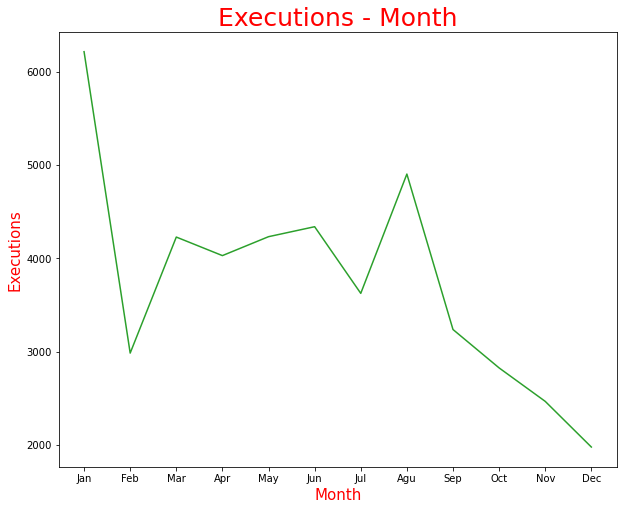

In [27]:
# Gráfico de ejecuciones por mes
y1 = data.groupby(data['executed_on'].dt.month).size()

time_graph(x1,y1,title,label_x,True)

###### CONCLUSIÓN
Como se puede observar en el gráfico el mes de Enero es en el cual se registran la mayor cantidad de ejecuciones mientras que a partir de Septiembre, comienza a decaer, siendo el mes de Diciembre el de menor cantidad de ejecuciones, esto se puede deber a los feriados de dicho mes y también al comienzo de las vacaciones (hay mayor cantidad de licencias en este mes)

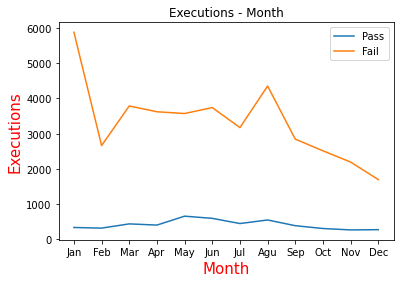

In [28]:
# Gráfico de ejecuciones fallidas vs existosas por mes

# Groupby por mes de ejecuciones fallidas/exitosas
y1 = pas.groupby(pas['executed_on'].dt.month).size()
y2 = fail.groupby(fail['executed_on'].dt.month).size()

# Variables del gráfico
y = [y1,y2]

time_graph(x1,y1,title, label_x,False)

###### CONCLUSIÓN
Como se puede observar en el gráfico el mes de Enero es en el cual se registran la mayor cantidad de ejecuciones fallidas, ya que es el mes con mayor cantidad de ejecuciones. Luego decae la cantidad de ejecuciones y por lo tanto la cantidad de casos fallidos. Otro mes con mayor ejecuciones fallidas es Agosto. Mientras que a partir de Marzo y hasta Julio se mantiene estable para volver a decaer a partir de Septiembre, siendo el mes de Diciembre el de menor cantidad.
En cuento a las ejecuciones exitosas, el gráfico nos muestra que se mantiene estable siendo mitad de año (meses de Mayo, Junio y Julio) donde se visualizan la mayor cantidad

### Promedio ejecuciones por semana 

In [29]:
# Variables comunes a gráfico semanal

# Se define la variable x1 la cual representa los valores a visualizar en el eje X
x1 = range (1,54)
title = "Executions - Week"
label_x='Week'

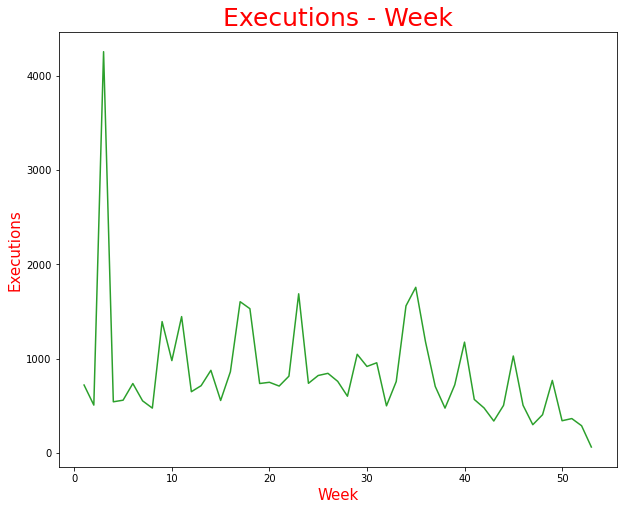

In [30]:
# Gráfico de ejecuciones por semana
y1 = data.groupby(data['executed_on'].dt.isocalendar().week).size()

time_graph(x1,y1,title, label_x,True)

###### CONCLUSIÓN
En cuanto a las ejecuciones por semana, este gráfico viene a complementar lo mismo que veíamos en las ejecuciones por mes, las primeras semanas del año se registran mayor cantidad de ejecuiones (más de 4000) mientras que a fin de año esa curva va decayendo. Un dato interesante que nos muestra este gráfico es la gran caída en la cantidad de ejecuciones que existe en las siguiente semanas (finales de Enero y Febrero), esto se puede deber a que existen menos recursos ejecutando, ya que coincide con el periodo vacacional. 
El resto del año, tal como se puede observa, es bastante más estable, las ejecuciones oscilan con valores similares

<ipython-input-31-fdad6323736d>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  y1 = pas.groupby(pas['executed_on'].dt.week).size()
<ipython-input-31-fdad6323736d>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  y2 = fail.groupby(fail['executed_on'].dt.week).size()


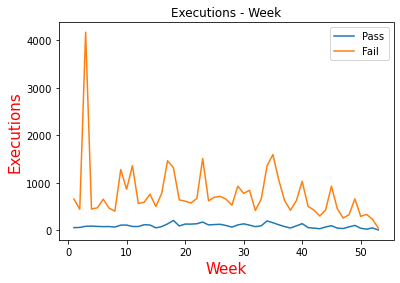

In [31]:
# Gráfico de ejecuciones fallidas vs existosas por semana

y1 = pas.groupby(pas['executed_on'].dt.week).size()
y2 = fail.groupby(fail['executed_on'].dt.week).size()

y = [y1,y2]

time_graph(x1,y1,title, label_x,False)

###### CONCLUSIÓN
Este gráfico es similar a lo visualizado con anterioridad, la mayor cantidad de ejecuciones fallidas se encuentran las primeras semanas del año mientras que las ejecuiones exitosas se mantienen más estables

### Análisis día de ejecución y día de creación 

In [9]:
#Crear un nuevo dataframe con 3 columnas: issue_key, executed_on y creation_date:
new_data = pd.DataFrame({
    'execution_status': data.execution_status,
    'executed_on': data.executed_on,
    'creation_date': data.creation_date})

#Convertir la columna executed_on y creation_date a datetime
new_data.executed_on = pd.to_datetime(new_data.executed_on)
new_data.creation_date = pd.to_datetime(new_data.creation_date)
new_data

execution_status executed_on creation_date
0                 pass  2023-06-10    2023-06-10
1                 fail  2023-05-10    2023-05-10
2                 pass  2023-05-10    2023-05-10
3                 pass  2023-05-10    2023-05-10
4                 pass  2023-04-10    2023-04-10
...                ...         ...           ...
45051             pass  2019-11-05    2019-04-30
45052             pass  2019-11-05    2019-04-30
45053             fail  2019-11-05    2019-04-30
45054             pass  2019-11-05    2019-04-30
45055             pass  2019-11-05    2019-04-30

[45056 rows x 3 columns]

In [10]:
ew_data= new_data.sort_values(by="executed_on")
new_data= new_data.sort_values(by="creation_date")
#dif_execution = new.groupby('issue_key').executed_on.shift(1)
new_data['dif_execution'] = (new_data.executed_on-new_data.creation_date).dt.days

# si se ejecuta el mismo día se tomo como premisa que la diferencia entre días es 0
new_data.fillna(0.5, inplace=True)
new_data

execution_status executed_on creation_date  dif_execution
27591             pass  2018-04-25    2018-01-13            102
29583             pass  2018-01-15    2018-01-15              0
31586             pass  2018-01-15    2018-01-15              0
31585             pass  2018-01-15    2018-01-15              0
31584             pass  2018-01-15    2018-01-15              0
...                ...         ...           ...            ...
243               pass  2023-12-09    2023-12-09              0
244               fail  2023-12-09    2023-12-09              0
246               pass  2023-12-09    2023-12-09              0
230               pass  2023-12-09    2023-12-09              0
239               pass  2023-12-09    2023-12-09              0

[45056 rows x 4 columns]

In [11]:
# Buscar cantidad de casos que se ejecutaron después de su creación
new_data["dif_execution"].value_counts()

 0      32522
 1       1330
 31       811
 2        615
 6        505
        ...  
 337        1
 657        1
-37         1
 50         1
-250        1
Name: dif_execution, Length: 433, dtype: int64

In [12]:
# Tabla de contigencia priority/execution_status
pd.crosstab(index=new_data['execution_status'],
            columns =new_data['dif_execution'],margins=True )

dif_execution     -332  -322  -321  -319  -318  -317  -315  -314  -307  -306  \
execution_status                                                               
fail                 1     3     0     0     1     1     0     2     0     0   
pass                 0     4    22     5     0     0     1     0     1     1   
All                  1     7    22     5     1     1     1     2     1     1   

dif_execution     ...  368  370  371  385  508  538  540  571  657    All  
execution_status  ...                                                      
fail              ...    0    0    0    0    0    0    0    0    1   5016  
pass              ...    1    1    2    1    2    2    1    3    0  40040  
All               ...    1    1    2    1    2    2    1    3    1  45056  

[3 rows x 434 columns]

In [15]:
#Mostrar aquellos resultados donde la diferencia sea mayor a 500 días
filtered_data = new_data[new_data['dif_execution'] > 500]

# Crear la tabla de contingencia con los datos filtrados
contingency_table = pd.crosstab(index=filtered_data['execution_status'],
                                 columns=filtered_data['dif_execution'],
                                 margins=True)

contingency_table

dif_execution     508  538  540  571  657  All
execution_status                              
fail                0    0    0    0    1    1
pass                2    2    1    3    0    8
All                 2    2    1    3    1    9

###### CONCLUSIÓN
Con las columnas creation_date y execution_date se creó una nueva columna denominada dif_execution. Esto se realizó para determinar si existía alguna relación entre estos datos, es decir, si un caso que se volvía a ejecutar tiempo después de su creación tiene más posibilidades de fallar que uno que se ejecuta el mismo día.
Como muetra la tabla generada, no existe tal relación, ya que por ejemplo, un caso cuya diferencia es de 538 días entre las ejecuciones, tuvo como resultado siempre ejecuciones exitosas. 

### Análisis de datos restantes  

In [7]:
from graphics import new_data
from graphics import top_values
from graphics import max_graph

#### Análisis variable Priority

In [39]:
#Se modifica el dato de Prioridad de variable int a str
mapeo = {5:'Bloqueadora', 4:'Crítica',3:'Mayor',2:'Media',1:'Menor',0:'Trivial'}
data['priority'] = data.loc[:, 'priority'].map(mapeo)

###### Ejecuciones fallidas/superadas según prioridad

In [40]:
# Tabla de contigencia priority/execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['priority'],margins=True)

priority          Bloqueadora  Mayor  Media  Menor  Trivial    All
execution_status                                                  
fail                      132   2377   1338    887        0   4734
pass                     6711  16042   9785   4482       38  37058
All                      6843  18419  11123   5369       38  41792

In [41]:
# Tabla de contigencia priority/execution_status en porcentajes relativos total
pd.crosstab(index=data['execution_status'],
            columns =data['priority'],margins=True).apply(lambda r: r/len(data)*100,
                                                         axis=1)

priority          Bloqueadora      Mayor      Media      Menor   Trivial  \
execution_status                                                           
fail                 0.292969   5.275657   2.969638   1.968661  0.000000   
pass                14.894798  35.604581  21.717418   9.947621  0.084339   
All                 15.187766  40.880238  24.687056  11.916282  0.084339   

priority                All  
execution_status             
fail              10.506925  
pass              82.248757  
All               92.755682

In [42]:
# Tabla de contigencia priority/status en porcentajes relativos según execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['priority'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

priority          Bloqueadora      Mayor      Media      Menor  Trivial
execution_status                                                       
fail                 1.928979  12.905152  12.029129  16.520767      0.0
pass                98.071021  87.094848  87.970871  83.479233    100.0

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

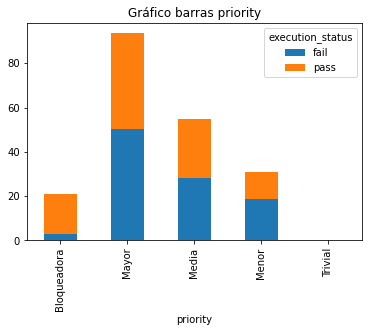

In [43]:
max_graph(data,'priority','execution_status','bar',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

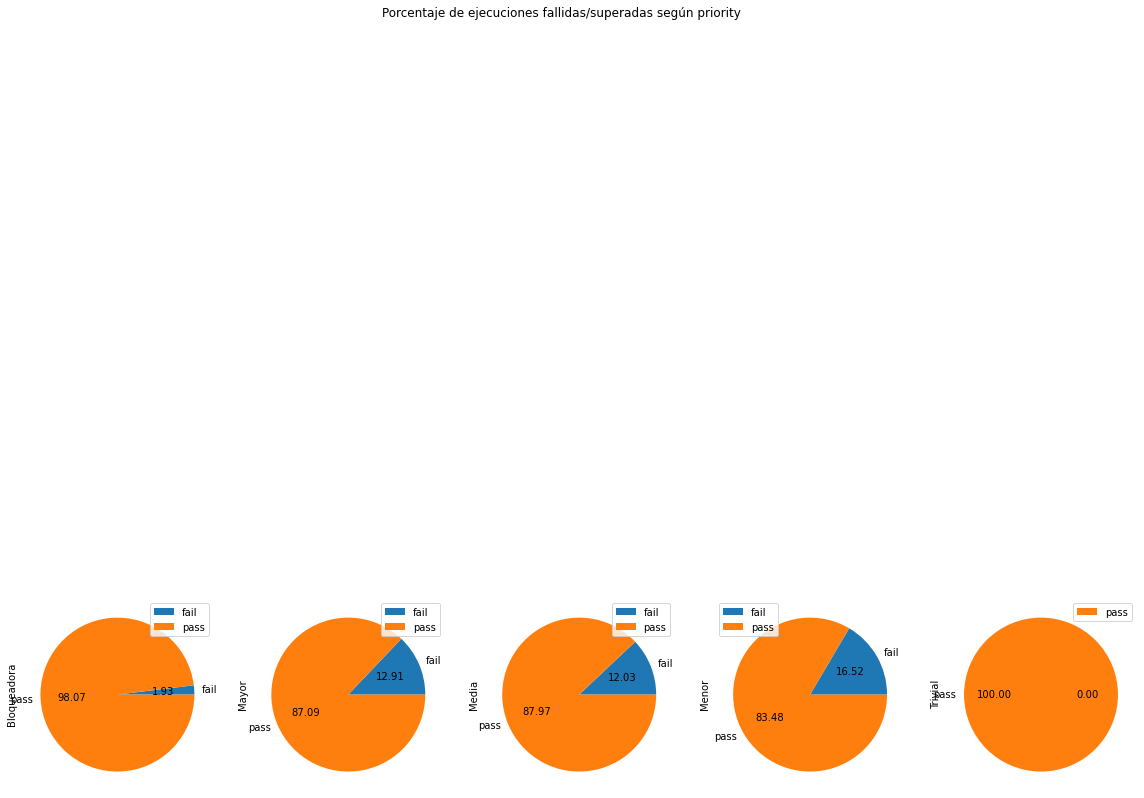

In [44]:
max_graph(data,'priority','execution_status','',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

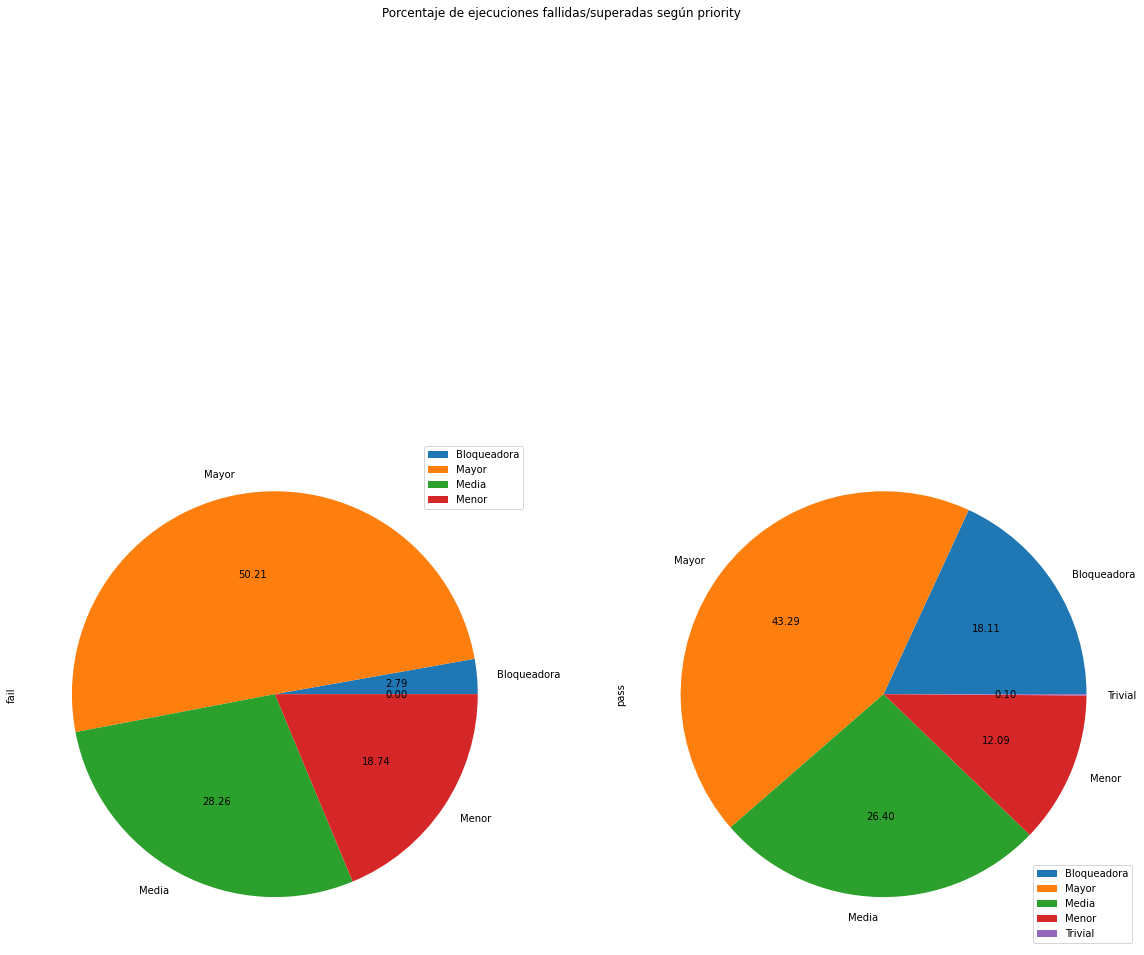

In [45]:
max_graph(data,'priority','execution_status','pie',False)

###### CONCLUSIÓN
Con respecto a la variable priority, se observa que si la prioridad es Trivial el caso no falla, mientras que si es Menor hay más posibilidades de que la ejecución no sea exitosa, aún más que si la prioridad es Bloqueado, Mayor o Media. Se puede determinar que esto es así debido a que no se le da la debida importancia a este tipo de ejecuciones (al ser menos importante que otros desarrollos quizás se subestima la misma)
Otro dato a destacar es que aquellas ejecuciones Bloqueantes tienen un bajo porcentaje de falla, casi el 2%. Esto es un buen dato ya que demuestra que al momento del desarrollo se presta mucha atención y se realizan las pruebas unitarias correspondientes

#### Análisis variable Cycle_name (Ciclo de ejecución)

##### Ciclo de ejecución según el estado de la ejecución

In [8]:
# Tabla de contigencia cycle_name/execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['cycle_name'],margins=True)

cycle_name        Ejecucion  Ejecucion_BDD  Ejecucion_Capacitacion  \
execution_status                                                     
fail                   3135              2                      54   
pass                  23881             44                    1233   
All                   27016             46                    1287   

cycle_name        Ejecucion_Java  Ejecucion_UAT  ReEjecucion1  ReEjecucion10  \
execution_status                                                               
fail                           5             16           789              3   
pass                          66             63          3186              2   
All                           71             79          3975              5   

cycle_name        ReEjecucion11  ReEjecucion12   ReEjecucion13  ...  \
execution_status                                                ...   
fail                          3               1              1  ...   
pass                          1               0              0  ...   
All                           4               1              1  ...   

cycle_name        ReEjecucion8  ReEjecucion9  Regresion_Android  \
execution_status                                                  
fail                         6             3                 11   
pass                         4             4                101   
All                         10             7                112   

cycle_name        Regresion_ChatBot  Regresion_Deploy  Regresion_Iphone  \
execution_status                                                          
fail                              0               352                 8   
pass                             16              8660               104   
All                              16              9012               112   

cycle_name        Regresion_JAVA  Regresion_PC  Regresion_UY    All  
execution_status                                                     
fail                          58            12             1   5016  
pass                         839           100            47  40040  
All                          897           112            48  45056  

[3 rows x 27 columns]

In [9]:
# Tabla de contigencia cycle_name/execution_status en porcentajes relativos total
pd.crosstab(index=data['execution_status'],
            columns =data['cycle_name'],margins=True).apply(lambda r: r/len(data)*100,
                                                         axis=1)


cycle_name        Ejecucion  Ejecucion_BDD  Ejecucion_Capacitacion  \
execution_status                                                     
fail               6.958008       0.004439                0.119851   
pass              53.002930       0.097656                2.736594   
All               59.960938       0.102095                2.856445   

cycle_name        Ejecucion_Java  Ejecucion_UAT  ReEjecucion1  ReEjecucion10  \
execution_status                                                               
fail                    0.011097       0.035511      1.751154       0.006658   
pass                    0.146484       0.139826      7.071200       0.004439   
All                     0.157582       0.175337      8.822354       0.011097   

cycle_name        ReEjecucion11  ReEjecucion12   ReEjecucion13  ...  \
execution_status                                                ...   
fail                   0.006658        0.002219       0.002219  ...   
pass                   0.002219        0.000000       0.000000  ...   
All                    0.008878        0.002219       0.002219  ...   

cycle_name        ReEjecucion8  ReEjecucion9  Regresion_Android  \
execution_status                                                  
fail                  0.013317      0.006658           0.024414   
pass                  0.008878      0.008878           0.224165   
All                   0.022195      0.015536           0.248580   

cycle_name        Regresion_ChatBot  Regresion_Deploy  Regresion_Iphone  \
execution_status                                                          
fail                       0.000000          0.781250          0.017756   
pass                       0.035511         19.220526          0.230824   
All                        0.035511         20.001776          0.248580   

cycle_name        Regresion_JAVA  Regresion_PC  Regresion_UY         All  
execution_status                                                          
fail                    0.128729      0.026634      0.002219   11.132812  
pass                    1.862127      0.221946      0.104315   88.867188  
All                     1.990856      0.248580      0.106534  100.000000  

[3 rows x 27 columns]

In [10]:
# Tabla de contigencia cycle_name/status en porcentajes relativos según execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['cycle_name'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

cycle_name        Ejecucion  Ejecucion_BDD  Ejecucion_Capacitacion  \
execution_status                                                     
fail              11.604235       4.347826                4.195804   
pass              88.395765      95.652174               95.804196   

cycle_name        Ejecucion_Java  Ejecucion_UAT  ReEjecucion1  ReEjecucion10  \
execution_status                                                               
fail                    7.042254      20.253165     19.849057           60.0   
pass                   92.957746      79.746835     80.150943           40.0   

cycle_name        ReEjecucion11  ReEjecucion12   ReEjecucion13  ...  \
execution_status                                                ...   
fail                       75.0           100.0          100.0  ...   
pass                       25.0             0.0            0.0  ...   

cycle_name        ReEjecucion7  ReEjecucion8  ReEjecucion9  Regresion_Android  \
execution_status                                                                
fail                  2.250804          60.0     42.857143           9.821429   
pass                 97.749196          40.0     57.142857          90.178571   

cycle_name        Regresion_ChatBot  Regresion_Deploy  Regresion_Iphone  \
execution_status                                                          
fail                            0.0          3.905903          7.142857   
pass                          100.0         96.094097         92.857143   

cycle_name        Regresion_JAVA  Regresion_PC  Regresion_UY  
execution_status                                              
fail                    6.465998     10.714286      2.083333  
pass                   93.534002     89.285714     97.916667  

[2 rows x 26 columns]

In [11]:
newdata_cycle = new_data('cycle_name',data)

In [12]:
top_values('cycle_name',newdata_cycle,5)

                        execution_status  bugs_found
cycle_name                                          
Ejecucion                          27016       27016
Regresion_Deploy                    9012        9012
ReEjecucion1                        3975        3975
Ejecucion_Capacitacion              1287        1287
ReEjecucion2                         952         952


In [13]:
top5 = newdata_cycle.loc[(newdata_cycle['cycle_name'] == 'Ejecucion') | (newdata_cycle['cycle_name'] == 'Regresion_Deploy') 
                    | (newdata_cycle['cycle_name'] == 'ReEjecucion1') | (newdata_cycle['cycle_name'] == 'ReEjecucion2')
                    | (newdata_cycle['cycle_name'] == 'Ejecucion_Capacitacion')] 

top5

cycle_name execution_status      bugs_found
0         Ejecucion             pass  not_found_bugs
1         Ejecucion             fail      found_bugs
2         Ejecucion             pass  not_found_bugs
3         Ejecucion             pass  not_found_bugs
4         Ejecucion             pass  not_found_bugs
...             ...              ...             ...
45051     Ejecucion             pass      found_bugs
45052  ReEjecucion1             pass      found_bugs
45053     Ejecucion             fail  not_found_bugs
45054     Ejecucion             pass  not_found_bugs
45055     Ejecucion             pass  not_found_bugs

[42242 rows x 3 columns]

In [52]:
# Tabla de contigencia cycle_name/status en porcentajes relativos según execution_status
pd.crosstab(index=top5['execution_status'],
            columns =top5['cycle_name'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

cycle_name        Ejecucion  Ejecucion_Capacitacion  ReEjecucion1  \
execution_status                                                    
fail              11.604235                4.195804     19.849057   
pass              88.395765               95.804196     80.150943   

cycle_name        ReEjecucion2  Regresion_Deploy  
execution_status                                  
fail                 31.092437          3.905903  
pass                 68.907563         96.094097

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

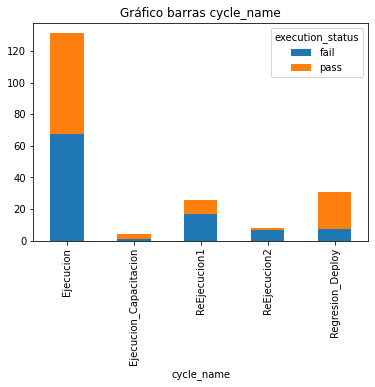

In [53]:
max_graph(top5,'cycle_name','execution_status','bar',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

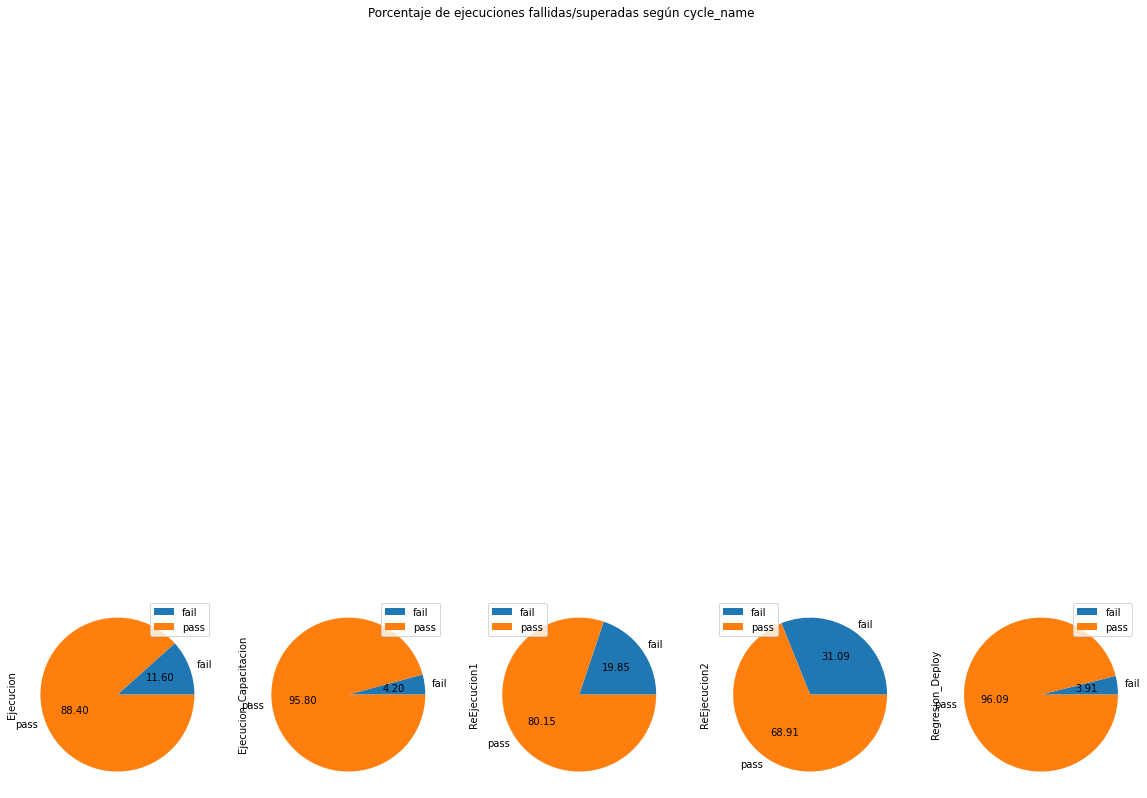

In [54]:
max_graph(top5,'cycle_name','execution_status','',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

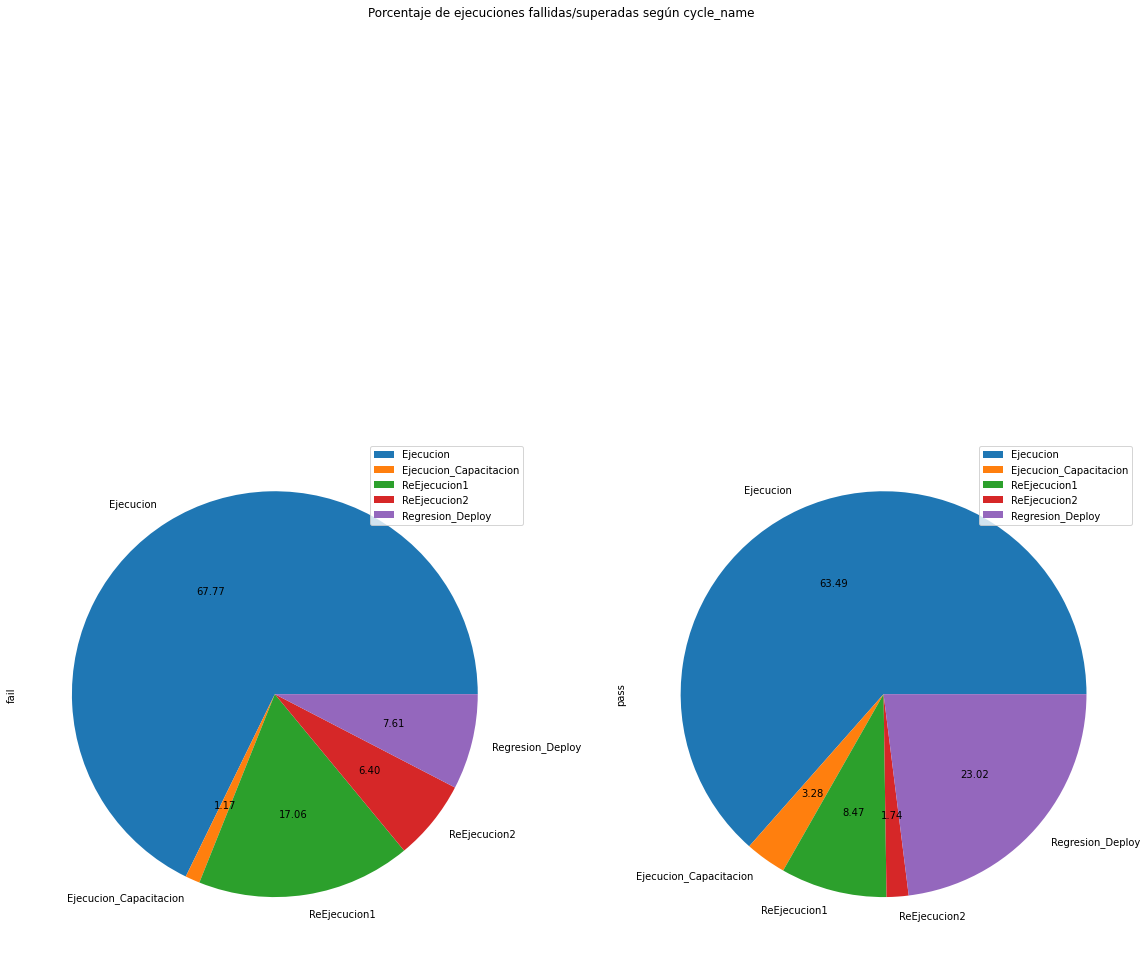

In [55]:
max_graph(top5,'cycle_name','execution_status','pie',False)

###### CONCLUSIÓN
Con respecto a la variable cycle_name, se observa que si la primera ejecución es la que cuenta con mayor cantidad de fallos, lo cual tiene sentido, debido a que la primera vez que se ejecuta un nuevo caso hay mayores posibilidades de que no sea exitoso.
La ReEjecución1 también tiene un porcentaje de fallos mayor, mientras que a partir de la ReEjecución2 comienza a disminuir. Se puede intuir que a mayor cantidad de cycle_name (ciclo de ejecución) menos fallos tendrá el caso, más estable se encontrará porque los errores irán encontrandose con menor frecuencia. 

##### Ciclo de ejecución según bugs

In [56]:
# Tabla de contigencia cycle_name/errores encontrados
pd.crosstab(index=data['bugs_found'],
            columns =data['cycle_name'],margins=True )

cycle_name      Ejecucion  Ejecucion_BDD  Ejecucion_Capacitacion  \
bugs_found                                                         
found_bugs           2925              1                      21   
not_found_bugs      24091             45                    1266   
All                 27016             46                    1287   

cycle_name      Ejecucion_Java  Ejecucion_UAT  ReEjecucion1  ReEjecucion10  \
bugs_found                                                                   
found_bugs                   5             16           763              3   
not_found_bugs              66             63          3212              2   
All                         71             79          3975              5   

cycle_name      ReEjecucion11  ReEjecucion12   ReEjecucion13  ...  \
bugs_found                                                    ...   
found_bugs                  3               1              1  ...   
not_found_bugs              1               0              0  ...   
All                         4               1              1  ...   

cycle_name      ReEjecucion8  ReEjecucion9  Regresion_Android  \
bugs_found                                                      
found_bugs                 6             3                 11   
not_found_bugs             4             4                101   
All                       10             7                112   

cycle_name      Regresion_ChatBot  Regresion_Deploy  Regresion_Iphone  \
bugs_found                                                              
found_bugs                      0               336                 8   
not_found_bugs                 16              8676               104   
All                            16              9012               112   

cycle_name      Regresion_JAVA  Regresion_PC  Regresion_UY    All  
bugs_found                                                         
found_bugs                  53            12             0   4712  
not_found_bugs             844           100            48  40344  
All                        897           112            48  45056  

[3 rows x 27 columns]

In [57]:
# Tabla de contigencia cycle_name/errores encontrados en porcentajes relativos total
pd.crosstab(index=data['bugs_found'],
            columns =data['cycle_name'],margins=True).apply(lambda r: r/len(data)*100,
                                                         axis=1)

cycle_name      Ejecucion  Ejecucion_BDD  Ejecucion_Capacitacion  \
bugs_found                                                         
found_bugs       6.491921       0.002219                0.046609   
not_found_bugs  53.469016       0.099876                2.809837   
All             59.960938       0.102095                2.856445   

cycle_name      Ejecucion_Java  Ejecucion_UAT  ReEjecucion1  ReEjecucion10  \
bugs_found                                                                   
found_bugs            0.011097       0.035511      1.693448       0.006658   
not_found_bugs        0.146484       0.139826      7.128906       0.004439   
All                   0.157582       0.175337      8.822354       0.011097   

cycle_name      ReEjecucion11  ReEjecucion12   ReEjecucion13  ...  \
bugs_found                                                    ...   
found_bugs           0.006658        0.002219       0.002219  ...   
not_found_bugs       0.002219        0.000000       0.000000  ...   
All                  0.008878        0.002219       0.002219  ...   

cycle_name      ReEjecucion8  ReEjecucion9  Regresion_Android  \
bugs_found                                                      
found_bugs          0.013317      0.006658           0.024414   
not_found_bugs      0.008878      0.008878           0.224165   
All                 0.022195      0.015536           0.248580   

cycle_name      Regresion_ChatBot  Regresion_Deploy  Regresion_Iphone  \
bugs_found                                                              
found_bugs               0.000000          0.745739          0.017756   
not_found_bugs           0.035511         19.256037          0.230824   
All                      0.035511         20.001776          0.248580   

cycle_name      Regresion_JAVA  Regresion_PC  Regresion_UY         All  
bugs_found                                                              
found_bugs            0.117631      0.026634      0.000000   10.458097  
not_found_bugs        1.873224      0.221946      0.106534   89.541903  
All                   1.990856      0.248580      0.106534  100.000000  

[3 rows x 27 columns]

In [58]:
# Tabla de contigencia cycle_name/bugs en porcentajes relativos según si encontró o no bugs
pd.crosstab(index=data['bugs_found'],
            columns =data['cycle_name'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

cycle_name      Ejecucion  Ejecucion_BDD  Ejecucion_Capacitacion  \
bugs_found                                                         
found_bugs      10.826917       2.173913                1.631702   
not_found_bugs  89.173083      97.826087               98.368298   

cycle_name      Ejecucion_Java  Ejecucion_UAT  ReEjecucion1  ReEjecucion10  \
bugs_found                                                                   
found_bugs            7.042254      20.253165     19.194969           60.0   
not_found_bugs       92.957746      79.746835     80.805031           40.0   

cycle_name      ReEjecucion11  ReEjecucion12   ReEjecucion13  ...  \
bugs_found                                                    ...   
found_bugs               75.0           100.0          100.0  ...   
not_found_bugs           25.0             0.0            0.0  ...   

cycle_name      ReEjecucion7  ReEjecucion8  ReEjecucion9  Regresion_Android  \
bugs_found                                                                    
found_bugs          2.250804          60.0     42.857143           9.821429   
not_found_bugs     97.749196          40.0     57.142857          90.178571   

cycle_name      Regresion_ChatBot  Regresion_Deploy  Regresion_Iphone  \
bugs_found                                                              
found_bugs                    0.0          3.728362          7.142857   
not_found_bugs              100.0         96.271638         92.857143   

cycle_name      Regresion_JAVA  Regresion_PC  Regresion_UY  
bugs_found                                                  
found_bugs            5.908584     10.714286           0.0  
not_found_bugs       94.091416     89.285714         100.0  

[2 rows x 26 columns]

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

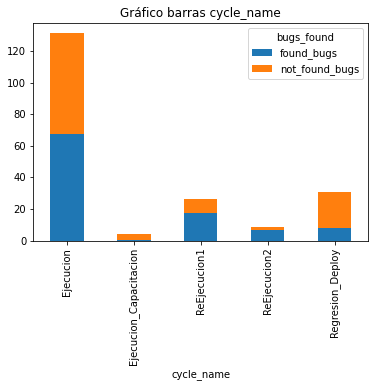

In [59]:
max_graph(top5,'cycle_name','bugs_found','bar',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

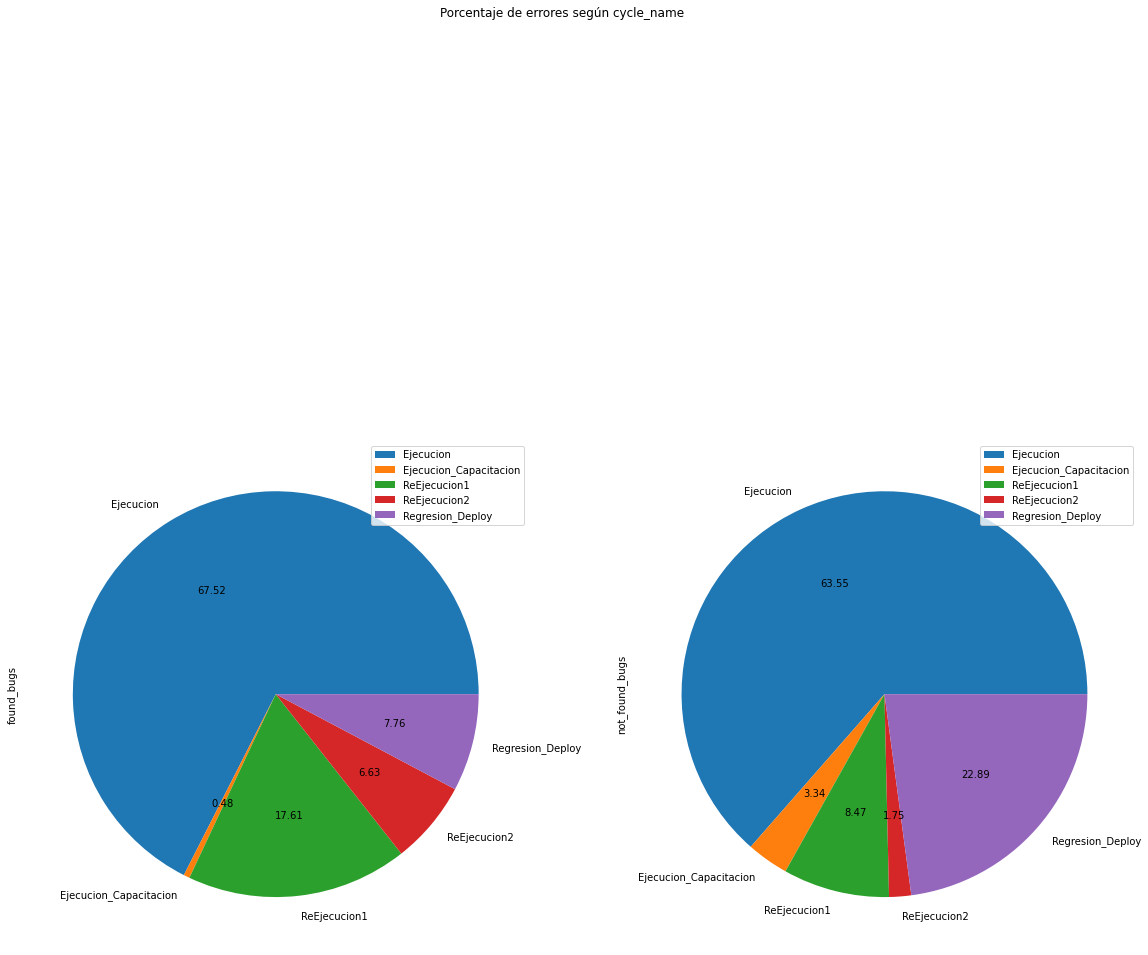

In [60]:
max_graph(top5,'cycle_name','bugs_found','pie',True)

###### CONCLUSIÓN
Con respecto a los errores encontrados en la variable cycle_name, se observa que la primera ejecución es la que cuenta con mayor cantidad de errores encontrados, lo cual tiene sentido, debido a que la primera vez que se ejecuta un nuevo caso hay mayores posibilidades de que no sea exitoso, por lo tanto, se encontrarán errores.
La ReEjecución1 también tiene un porcentaje de errores mayor, mientras que a partir de la ReEjecución2 comienza a disminuir. Se puede intuir que a mayor cantidad de cycle_name (ciclo de ejecución) menos errores se encontrarán. 

#### Análisis variable Component

In [61]:
# Tabla de contigencia component/execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['component'],margins=True )

component         CAN_Mantenimiento_APPClientes  \
execution_status                                  
fail                                        411   
pass                                        987   
All                                        1398   

component         CAN_Mantenimiento_APPClientes,CAN_Mantenimiento_autogestionionSS  \
execution_status                                                                     
fail                                                              0                  
pass                                                              3                  
All                                                               3                  

component         CAN_Mantenimiento_APPIntermediarios  \
execution_status                                        
fail                                                3   
pass                                                6   
All                                                 9   

component         CAN_Mantenimiento_autogestionionPSAL  \
execution_status                                         
fail                                                74   
pass                                               652   
All                                                726   

component         Cotizar-Emitir-Contabilizar-Cobrar  \
execution_status                                       
fail                                               1   
pass                                               4   
All                                                5   

component         DW SSUY,SSE_Mantenimiento_APNova  \
execution_status                                     
fail                                             2   
pass                                             1   
All                                              3   

component         Reclamar-Gestionar-Liquidar-Pagar  Regresion SAP  \
execution_status                                                     
fail                                              0             41   
pass                                              5            245   
All                                               5            286   

component         SSE-Mantenimiento-UP  \
execution_status                         
fail                               189   
pass                               528   
All                                717   

component         SSE-Mantenimiento-UP,SSE_UP_R2_Integracion  ...  \
execution_status                                              ...   
fail                                                       0  ...   
pass                                                       2  ...   
All                                                        2  ...   

component         SSE_Intermediar Center - Post Produccion  \
execution_status                                             
fail                                                    20   
pass                                                   225   
All                                                    245   

component         SSE_Mantenimiento_APNova  SSE_Mantenimiento_APPCMagma  \
execution_status                                                          
fail                                  1897                           90   
pass                                 21507                          605   
All                                  23404                          695   

component         SSE_Mantenimiento_APPCTime  \
execution_status                               
fail                                     599   
pass                                    9918   
All                                    10517   

component         SSE_Mantenimiento_APPCTime,SSE_UP_R2_Legados  \
execution_status                                                 
fail                                                        33   
pass                                                       682   
All                                                        715   

component        

In [62]:
# Tabla de contigencia component/execution_status en porcentajes relativos total
pd.crosstab(index=data['execution_status'],
            columns =data['component'],margins=True).apply(lambda r: r/len(data)*100,
                                                         axis=1)

component         CAN_Mantenimiento_APPClientes  \
execution_status                                  
fail                                   0.912198   
pass                                   2.190607   
All                                    3.102805   

component         CAN_Mantenimiento_APPClientes,CAN_Mantenimiento_autogestionionSS  \
execution_status                                                                     
fail                                                       0.000000                  
pass                                                       0.006658                  
All                                                        0.006658                  

component         CAN_Mantenimiento_APPIntermediarios  \
execution_status                                        
fail                                         0.006658   
pass                                         0.013317   
All                                          0.019975   

component         CAN_Mantenimiento_autogestionionPSAL  \
execution_status                                         
fail                                          0.164240   
pass                                          1.447088   
All                                           1.611328   

component         Cotizar-Emitir-Contabilizar-Cobrar  \
execution_status                                       
fail                                        0.002219   
pass                                        0.008878   
All                                         0.011097   

component         DW SSUY,SSE_Mantenimiento_APNova  \
execution_status                                     
fail                                      0.004439   
pass                                      0.002219   
All                                       0.006658   

component         Reclamar-Gestionar-Liquidar-Pagar  Regresion SAP  \
execution_status                                                     
fail                                       0.000000       0.090998   
pass                                       0.011097       0.543768   
All                                        0.011097       0.634766   

component         SSE-Mantenimiento-UP  \
execution_status                         
fail                          0.419478   
pass                          1.171875   
All                           1.591353   

component         SSE-Mantenimiento-UP,SSE_UP_R2_Integracion  ...  \
execution_status                                              ...   
fail                                                0.000000  ...   
pass                                                0.004439  ...   
All                                                 0.004439  ...   

component         SSE_Intermediar Center - Post Produccion  \
execution_status                                             
fail                                              0.044389   
pass                                              0.499379   
All                                               0.543768   

component         SSE_Mantenimiento_APNova  SSE_Mantenimiento_APPCMagma  \
execution_status                                                          
fail                              4.210316                     0.199751   
pass                             47.733931                     1.342773   
All                              51.944247                     1.542525   

component         SSE_Mantenimiento_APPCTime  \
execution_status                               
fail                                1.329457   
pass                               22.012607   
All                                23.342063   

component         SSE_Mantenimiento_APPCTime,SSE_UP_R2_Legados  \
execution_status                                                 
fail                                                  0.073242   
pass                                                  1.513672   
All                                                   1.586914   

component        

In [63]:
# Tabla de contigencia component/status en porcentajes relativos según execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['component'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)


component         CAN_Mantenimiento_APPClientes  \
execution_status                                  
fail                                  29.399142   
pass                                  70.600858   

component         CAN_Mantenimiento_APPClientes,CAN_Mantenimiento_autogestionionSS  \
execution_status                                                                     
fail                                                            0.0                  
pass                                                          100.0                  

component         CAN_Mantenimiento_APPIntermediarios  \
execution_status                                        
fail                                        33.333333   
pass                                        66.666667   

component         CAN_Mantenimiento_autogestionionPSAL  \
execution_status                                         
fail                                         10.192837   
pass                                         89.807163   

component         Cotizar-Emitir-Contabilizar-Cobrar  \
execution_status                                       
fail                                            20.0   
pass                                            80.0   

component         DW SSUY,SSE_Mantenimiento_APNova  \
execution_status                                     
fail                                     66.666667   
pass                                     33.333333   

component         Reclamar-Gestionar-Liquidar-Pagar  Regresion SAP  \
execution_status                                                     
fail                                            0.0      14.335664   
pass                                          100.0      85.664336   

component         SSE-Mantenimiento-UP  \
execution_status                         
fail                         26.359833   
pass                         73.640167   

component         SSE-Mantenimiento-UP,SSE_UP_R2_Integracion  ...  \
execution_status                                              ...   
fail                                                     0.0  ...   
pass                                                   100.0  ...   

component         SSE_CargaDatos_UP_R2_C3  \
execution_status                            
fail                                  0.0   
pass                                100.0   

component         SSE_Intermediar Center - Post Produccion  \
execution_status                                             
fail                                              8.163265   
pass                                             91.836735   

component         SSE_Mantenimiento_APNova  SSE_Mantenimiento_APPCMagma  \
execution_status                                                          
fail                              8.105452                     12.94964   
pass                             91.894548                     87.05036   

component         SSE_Mantenimiento_APPCTime  \
execution_status                               
fail                                5.695541   
pass                               94.304459   

component         SSE_Mantenimiento_APPCTime,SSE_UP_R2_Legados  \
execution_status                                                 
fail                                                  4.615385   
pass                                                 95.384615   

component         SSE_UP_R2_Integracion  SSE_UP_R2_Legados  \
execution_status                                             
fail                          18.041237           4.444444   
pass                          81.958763          95.555556   

component         SSE__UP_EndToEnd_Tst_C2  Testing - R3  
execution_status                                         
fail                            28.571429     28.088102  
pass                            71.428571     71.911898  

[2 rows x 23 columns]

In [64]:
newdata_component = new_data('component',data) #data[['component', 'execution_status','bugs_found']].copy()

In [65]:
top_values('component',newdata_component,5)

                               execution_status  bugs_found
component                                                  
SSE_Mantenimiento_APNova                  23404       23404
SSE_Mantenimiento_APPCTime                10517       10517
Testing - R3                               4404        4404
CAN_Mantenimiento_APPClientes              1398        1398
SSE_UP_R2_Integracion                      1358        1358


In [66]:
top5 = newdata_component.loc[(newdata_component['component'] == 'SSE_Mantenimiento_APNova') 
                             | (newdata_component['component'] == 'SSE_Mantenimiento_APPCTime') 
                             | (newdata_component['component'] == 'Testing - R3') 
                             | (newdata_component['component'] == 'CAN_Mantenimiento_APPClientes')
                             | (newdata_component['component'] == 'SSE_UP_R2_Integracion')] 

top5

component execution_status      bugs_found
0      SSE_Mantenimiento_APNova             pass  not_found_bugs
1      SSE_Mantenimiento_APNova             fail      found_bugs
2      SSE_Mantenimiento_APNova             pass  not_found_bugs
3      SSE_Mantenimiento_APNova             pass  not_found_bugs
4      SSE_Mantenimiento_APNova             pass  not_found_bugs
...                         ...              ...             ...
45051     SSE_UP_R2_Integracion             pass      found_bugs
45052     SSE_UP_R2_Integracion             pass      found_bugs
45053     SSE_UP_R2_Integracion             fail  not_found_bugs
45054     SSE_UP_R2_Integracion             pass  not_found_bugs
45055     SSE_UP_R2_Integracion             pass  not_found_bugs

[41081 rows x 3 columns]

In [67]:
# Tabla de contigencia cycle_name/status en porcentajes relativos según execution_status
pd.crosstab(index=top5['execution_status'],
            columns =top5['component'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

component         CAN_Mantenimiento_APPClientes  SSE_Mantenimiento_APNova  \
execution_status                                                            
fail                                  29.399142                  8.105452   
pass                                  70.600858                 91.894548   

component         SSE_Mantenimiento_APPCTime  SSE_UP_R2_Integracion  \
execution_status                                                      
fail                                5.695541              18.041237   
pass                               94.304459              81.958763   

component         Testing - R3  
execution_status                
fail                 28.088102  
pass                 71.911898

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

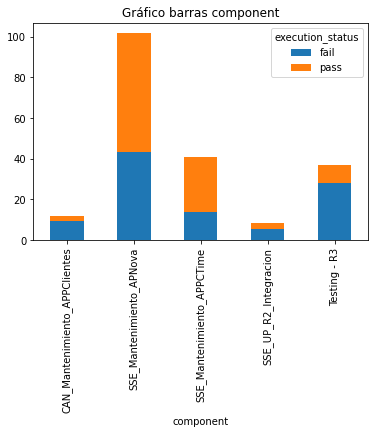

In [68]:
max_graph(top5,'component','execution_status','bar',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

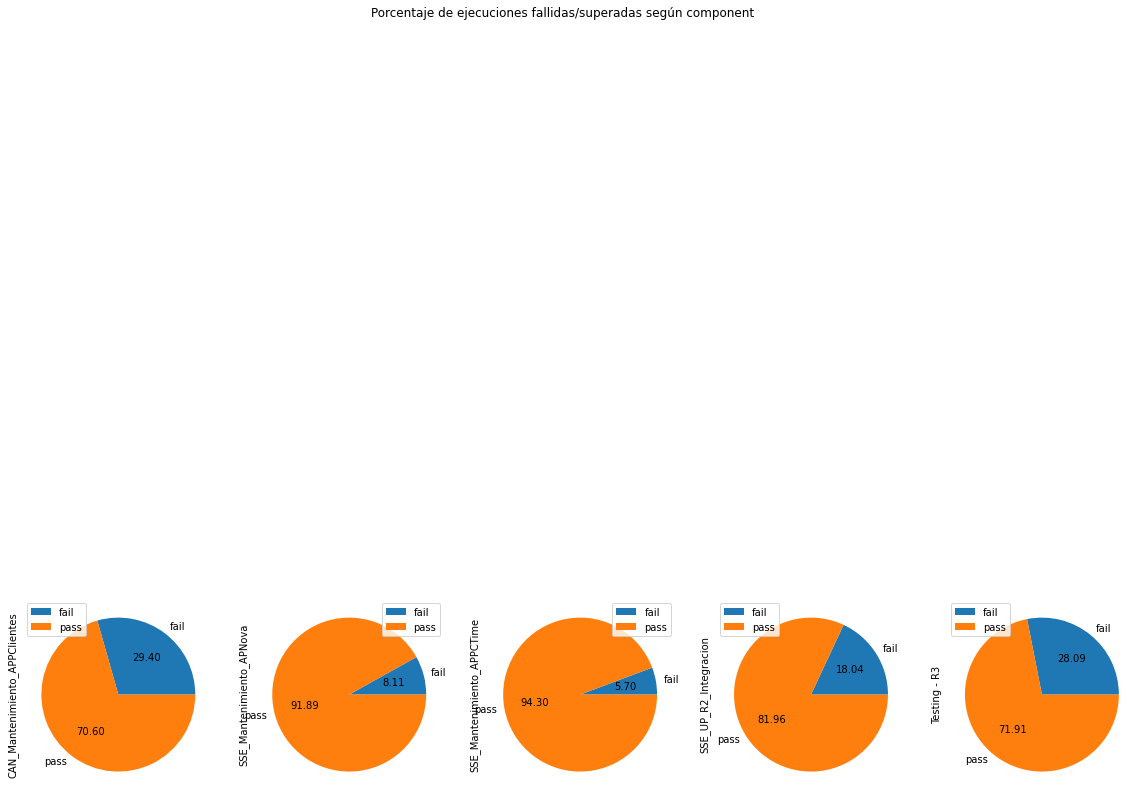

In [69]:
max_graph(top5,'component','execution_status','',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

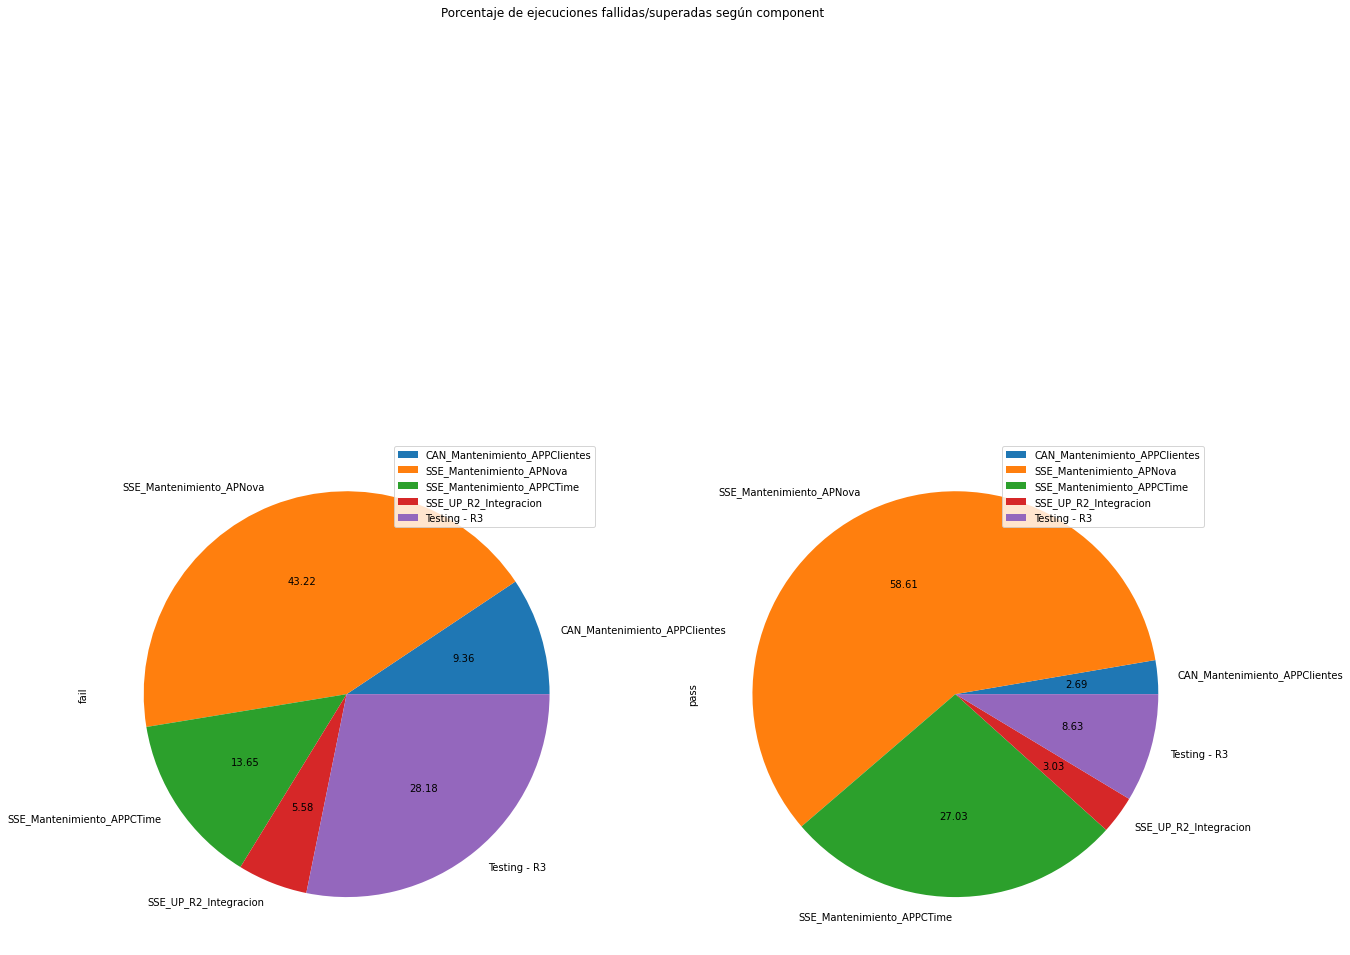

In [70]:
max_graph(top5,'component','execution_status','pie',False)

###### CONCLUSIÓN
Con respecto a la variable component, se observa que los componentes CAN_Mantenimiento_APPClientes y Testing-R3 son los que más veces fallaron con respecto a el resto de componentes. Mientras que SSE_Mantenimiento_APNova fue el que mayor cantidad de ejecuciones tuvo, logrando casi el 60% de las veces ejecuciones exitosas sobre el total. A esto le sigue SSE_Mantenimiento_APPCTime con casi el 30% de casos exitosos sobre el total.
Si tomamos en cuenta las variables y los porcenjes podemos observar que las ejecuciones realizadas en mantenimiento (CAN_Mantenimiento_APPClientes, SSE_Mantenimiento_APNova y SSE_Mantenimiento_APPCTime) son las que más fallas presentas (66% con respecto al total) 

##### Componentes y errores

In [71]:
# Tabla de contigencia component/errores encontrados
pd.crosstab(index=data['bugs_found'],
            columns =data['component'],margins=True )

component       CAN_Mantenimiento_APPClientes  \
bugs_found                                      
found_bugs                                407   
not_found_bugs                            991   
All                                      1398   

component       CAN_Mantenimiento_APPClientes,CAN_Mantenimiento_autogestionionSS  \
bugs_found                                                                         
found_bugs                                                      0                  
not_found_bugs                                                  3                  
All                                                             3                  

component       CAN_Mantenimiento_APPIntermediarios  \
bugs_found                                            
found_bugs                                        3   
not_found_bugs                                    6   
All                                               9   

component       CAN_Mantenimiento_autogestionionPSAL  \
bugs_found                                             
found_bugs                                        74   
not_found_bugs                                   652   
All                                              726   

component       Cotizar-Emitir-Contabilizar-Cobrar  \
bugs_found                                           
found_bugs                                       1   
not_found_bugs                                   4   
All                                              5   

component       DW SSUY,SSE_Mantenimiento_APNova  \
bugs_found                                         
found_bugs                                     2   
not_found_bugs                                 1   
All                                            3   

component       Reclamar-Gestionar-Liquidar-Pagar  Regresion SAP  \
bugs_found                                                         
found_bugs                                      0             39   
not_found_bugs                                  5            247   
All                                             5            286   

component       SSE-Mantenimiento-UP  \
bugs_found                             
found_bugs                       183   
not_found_bugs                   534   
All                              717   

component       SSE-Mantenimiento-UP,SSE_UP_R2_Integracion  ...  \
bugs_found                                                  ...   
found_bugs                                               0  ...   
not_found_bugs                                           2  ...   
All                                                      2  ...   

component       SSE_Intermediar Center - Post Produccion  \
bugs_found                                                 
found_bugs                                            20   
not_found_bugs                                       225   
All                                                  245   

component       SSE_Mantenimiento_APNova  SSE_Mantenimiento_APPCMagma  \
bugs_found                                                              
found_bugs                          1712                           88   
not_found_bugs                     21692                          607   
All                                23404                          695   

component       SSE_Mantenimiento_APPCTime  \
bugs_found                                   
found_bugs                             555   
not_found_bugs                        9962   
All                                  10517   

component       SSE_Mantenimiento_APPCTime,SSE_UP_R2_Legados  \
bugs_found                                                     
found_bugs                                                33   
not_found_bugs                                           682   
All                                                      715   

component       SSE_UP_R2_Integracion  SSE_UP_R2_Legados  \
bugs_found                                                 
found_bugs                 

In [72]:
# Tabla de contigencia component/errores encontrados en porcentajes relativos total
pd.crosstab(index=data['bugs_found'],
            columns =data['component'],margins=True).apply(lambda r: r/len(data)*100,
                                                         axis=1)

component       CAN_Mantenimiento_APPClientes  \
bugs_found                                      
found_bugs                           0.903320   
not_found_bugs                       2.199485   
All                                  3.102805   

component       CAN_Mantenimiento_APPClientes,CAN_Mantenimiento_autogestionionSS  \
bugs_found                                                                         
found_bugs                                               0.000000                  
not_found_bugs                                           0.006658                  
All                                                      0.006658                  

component       CAN_Mantenimiento_APPIntermediarios  \
bugs_found                                            
found_bugs                                 0.006658   
not_found_bugs                             0.013317   
All                                        0.019975   

component       CAN_Mantenimiento_autogestionionPSAL  \
bugs_found                                             
found_bugs                                  0.164240   
not_found_bugs                              1.447088   
All                                         1.611328   

component       Cotizar-Emitir-Contabilizar-Cobrar  \
bugs_found                                           
found_bugs                                0.002219   
not_found_bugs                            0.008878   
All                                       0.011097   

component       DW SSUY,SSE_Mantenimiento_APNova  \
bugs_found                                         
found_bugs                              0.004439   
not_found_bugs                          0.002219   
All                                     0.006658   

component       Reclamar-Gestionar-Liquidar-Pagar  Regresion SAP  \
bugs_found                                                         
found_bugs                               0.000000       0.086559   
not_found_bugs                           0.011097       0.548207   
All                                      0.011097       0.634766   

component       SSE-Mantenimiento-UP  \
bugs_found                             
found_bugs                  0.406161   
not_found_bugs              1.185192   
All                         1.591353   

component       SSE-Mantenimiento-UP,SSE_UP_R2_Integracion  ...  \
bugs_found                                                  ...   
found_bugs                                        0.000000  ...   
not_found_bugs                                    0.004439  ...   
All                                               0.004439  ...   

component       SSE_Intermediar Center - Post Produccion  \
bugs_found                                                 
found_bugs                                      0.044389   
not_found_bugs                                  0.499379   
All                                             0.543768   

component       SSE_Mantenimiento_APNova  SSE_Mantenimiento_APPCMagma  \
bugs_found                                                              
found_bugs                      3.799716                     0.195312   
not_found_bugs                 48.144531                     1.347212   
All                            51.944247                     1.542525   

component       SSE_Mantenimiento_APPCTime  \
bugs_found                                   
found_bugs                        1.231800   
not_found_bugs                   22.110263   
All                              23.342063   

component       SSE_Mantenimiento_APPCTime,SSE_UP_R2_Legados  \
bugs_found                                                     
found_bugs                                          0.073242   
not_found_bugs                                      1.513672   
All                                                 1.586914   

component       SSE_UP_R2_Integracion  SSE_UP_R2_Legados  \
bugs_found                                                 
found_bugs                 

In [73]:
# Tabla de contigencia component/bugs en porcentajes relativos según si encontró o no bugs
pd.crosstab(index=data['bugs_found'],
            columns =data['component'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

component       CAN_Mantenimiento_APPClientes  \
bugs_found                                      
found_bugs                          29.113019   
not_found_bugs                      70.886981   

component       CAN_Mantenimiento_APPClientes,CAN_Mantenimiento_autogestionionSS  \
bugs_found                                                                         
found_bugs                                                    0.0                  
not_found_bugs                                              100.0                  

component       CAN_Mantenimiento_APPIntermediarios  \
bugs_found                                            
found_bugs                                33.333333   
not_found_bugs                            66.666667   

component       CAN_Mantenimiento_autogestionionPSAL  \
bugs_found                                             
found_bugs                                 10.192837   
not_found_bugs                             89.807163   

component       Cotizar-Emitir-Contabilizar-Cobrar  \
bugs_found                                           
found_bugs                                    20.0   
not_found_bugs                                80.0   

component       DW SSUY,SSE_Mantenimiento_APNova  \
bugs_found                                         
found_bugs                             66.666667   
not_found_bugs                         33.333333   

component       Reclamar-Gestionar-Liquidar-Pagar  Regresion SAP  \
bugs_found                                                         
found_bugs                                    0.0      13.636364   
not_found_bugs                              100.0      86.363636   

component       SSE-Mantenimiento-UP  \
bugs_found                             
found_bugs                 25.523013   
not_found_bugs             74.476987   

component       SSE-Mantenimiento-UP,SSE_UP_R2_Integracion  ...  \
bugs_found                                                  ...   
found_bugs                                             0.0  ...   
not_found_bugs                                       100.0  ...   

component       SSE_CargaDatos_UP_R2_C3  \
bugs_found                                
found_bugs                          0.0   
not_found_bugs                    100.0   

component       SSE_Intermediar Center - Post Produccion  \
bugs_found                                                 
found_bugs                                      8.163265   
not_found_bugs                                 91.836735   

component       SSE_Mantenimiento_APNova  SSE_Mantenimiento_APPCMagma  \
bugs_found                                                              
found_bugs                      7.314989                    12.661871   
not_found_bugs                 92.685011                    87.338129   

component       SSE_Mantenimiento_APPCTime  \
bugs_found                                   
found_bugs                         5.27717   
not_found_bugs                    94.72283   

component       SSE_Mantenimiento_APPCTime,SSE_UP_R2_Legados  \
bugs_found                                                     
found_bugs                                          4.615385   
not_found_bugs                                     95.384615   

component       SSE_UP_R2_Integracion  SSE_UP_R2_Legados  \
bugs_found                                                 
found_bugs                  18.188513           4.444444   
not_found_bugs              81.811487          95.555556   

component       SSE__UP_EndToEnd_Tst_C2  Testing - R3  
bugs_found                                             
found_bugs                    28.571429     27.429609  
not_found_bugs                71.428571     72.570391  

[2 rows x 23 columns]

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

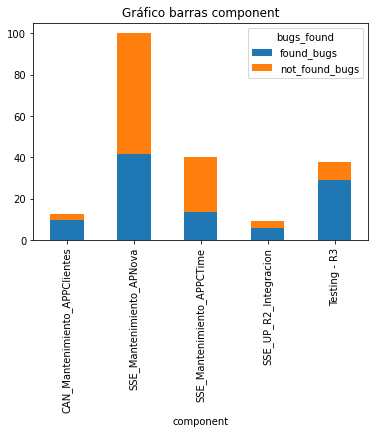

In [74]:
max_graph(top5,'component','bugs_found','bar',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

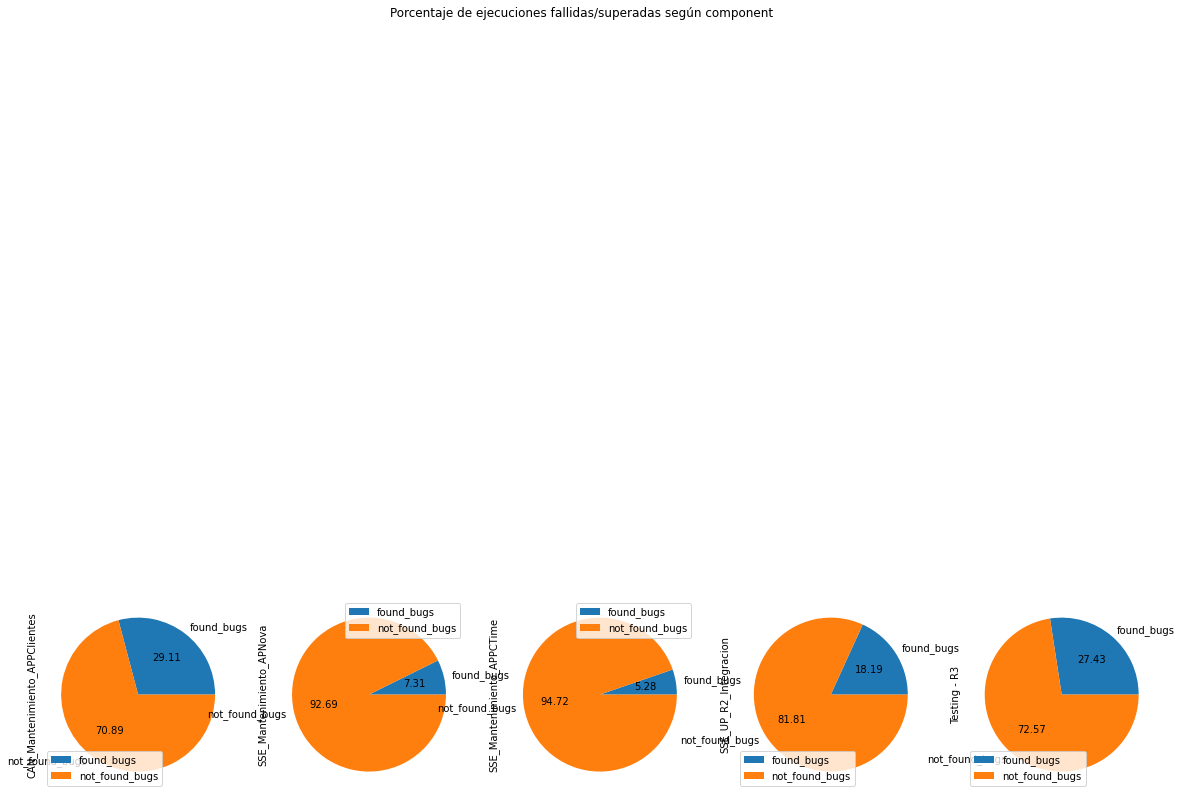

In [75]:
max_graph(top5,'component','bugs_found','',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

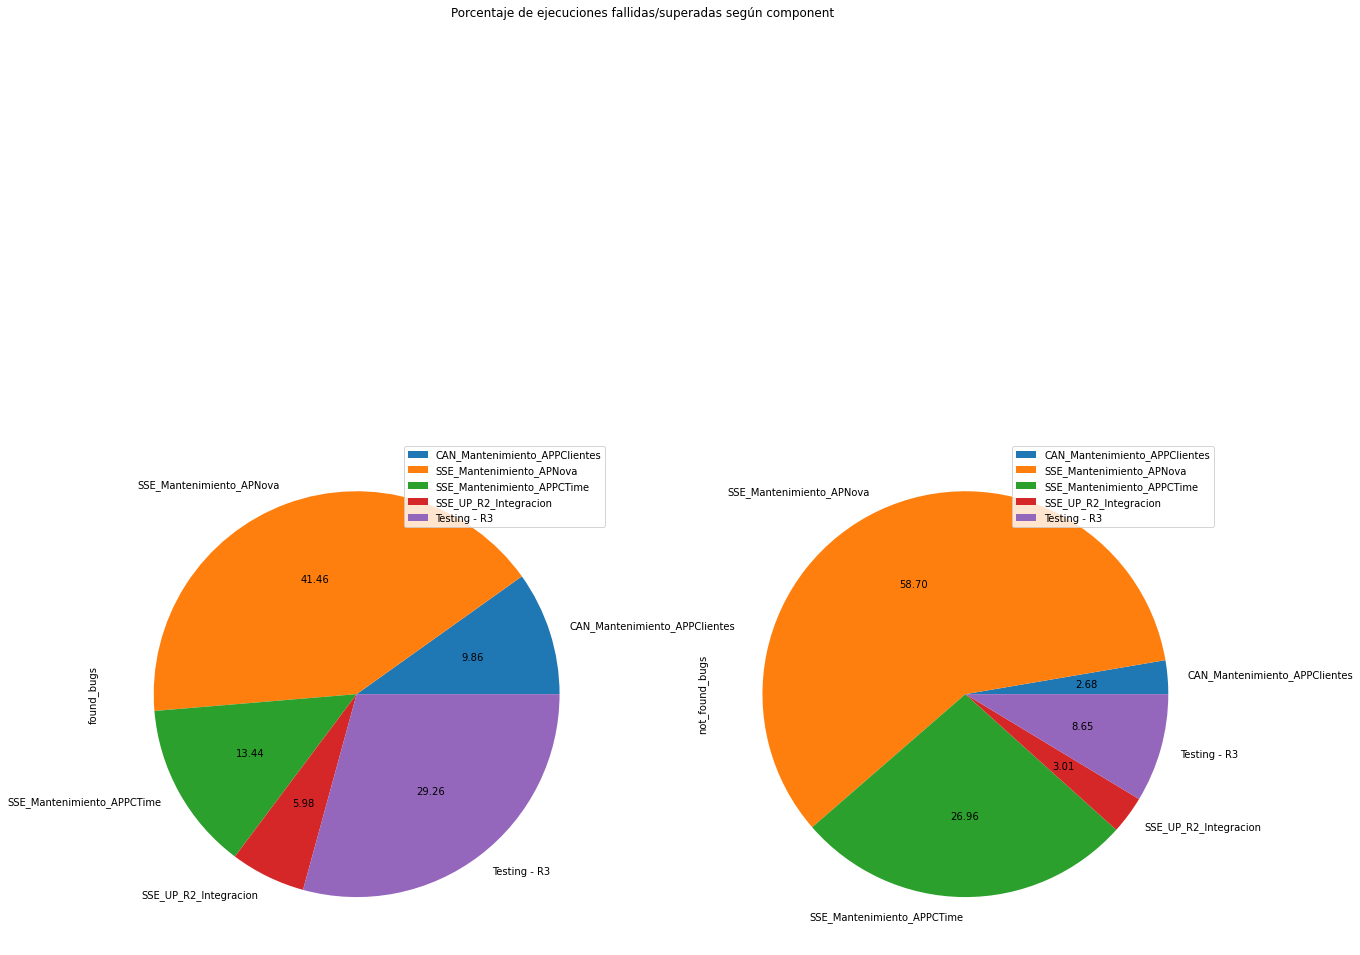

In [76]:
max_graph(top5,'component','bugs_found','pie',False)

###### CONCLUSIÓN
Con respecto los errores en la variable component, se observa que los componentes CAN_Mantenimiento_APPClientes y Testing-R3, al ser los que más veces fallaron, son también en los que más errores se encontraron; coincidiendo con lo visualizado en las ejecuciones

#### Análisis variable Version 

In [77]:
# Tabla de contigencia version/execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['version'],margins=True )

version           ART - Testing  ActHana-HC1  ActHana-V. 1909 - HQ0  \
execution_status                                                      
fail                          4            1                      0   
pass                         56            3                      4   
All                          60            4                      4   

version           ActHana-V. 1909 - HR0  BKO - BUP  CAN - Ceibo  \
execution_status                                                  
fail                                  0          2            2   
pass                                  2         18            1   
All                                   2         20            3   

version           CAN - Cotizadores  CAN - Integraciones  CAN - Mobile  \
execution_status                                                         
fail                              0                    0           381   
pass                              2                    6           868   
All                               2                    6          1249   

version           CAN - Prevenet  ...  SSE_NOVA_NEO_TST  \
execution_status                  ...                     
fail                           2  ...                 0   
pass                          17  ...                 3   
All                           19  ...                 3   

version           SSE_Proyecto_Comisiones_TST  SSE__UP_EndToEnd_C2  \
execution_status                                                     
fail                                        9                   52   
pass                                       25                  117   
All                                        34                  169   

version           SSe - TIME-UP-IntegracionR2-TST  \
execution_status                                    
fail                                           48   
pass                                          665   
All                                           713   

version           SSe - TIME-UP-IntegraconR2-TST  SSe - Time - TST  \
execution_status                                                     
fail                                           1                46   
pass                                           0              5634   
All                                            1              5680   

version           SSe - Time-PRE  Smoke-R3  Unscheduled    All  
execution_status                                                
fail                         466       108          116   5016  
pass                        3717       122          991  40040  
All                         4183       230         1107  45056  

[3 rows x 49 columns]

In [78]:
# Tabla de contigencia version/execution_status en porcentajes relativos total
pd.crosstab(index=data['execution_status'],
            columns =data['version'],margins=True).apply(lambda r: r/len(data)*100,
                                                         axis=1)

version           ART - Testing  ActHana-HC1  ActHana-V. 1909 - HQ0  \
execution_status                                                      
fail                   0.008878     0.002219               0.000000   
pass                   0.124290     0.006658               0.008878   
All                    0.133168     0.008878               0.008878   

version           ActHana-V. 1909 - HR0  BKO - BUP  CAN - Ceibo  \
execution_status                                                  
fail                           0.000000   0.004439     0.004439   
pass                           0.004439   0.039950     0.002219   
All                            0.004439   0.044389     0.006658   

version           CAN - Cotizadores  CAN - Integraciones  CAN - Mobile  \
execution_status                                                         
fail                       0.000000             0.000000      0.845614   
pass                       0.004439             0.013317      1.926491   
All                        0.004439             0.013317      2.772106   

version           CAN - Prevenet  ...  SSE_NOVA_NEO_TST  \
execution_status                  ...                     
fail                    0.004439  ...          0.000000   
pass                    0.037731  ...          0.006658   
All                     0.042170  ...          0.006658   

version           SSE_Proyecto_Comisiones_TST  SSE__UP_EndToEnd_C2  \
execution_status                                                     
fail                                 0.019975             0.115412   
pass                                 0.055487             0.259677   
All                                  0.075462             0.375089   

version           SSe - TIME-UP-IntegracionR2-TST  \
execution_status                                    
fail                                     0.106534   
pass                                     1.475941   
All                                      1.582475   

version           SSe - TIME-UP-IntegraconR2-TST  SSe - Time - TST  \
execution_status                                                     
fail                                    0.002219          0.102095   
pass                                    0.000000         12.504439   
All                                     0.002219         12.606534   

version           SSe - Time-PRE  Smoke-R3  Unscheduled         All  
execution_status                                                     
fail                    1.034268  0.239702     0.257457   11.132812  
pass                    8.249734  0.270774     2.199485   88.867188  
All                     9.284002  0.510476     2.456942  100.000000  

[3 rows x 49 columns]

In [79]:
# Tabla de contigencia version/status en porcentajes relativos según execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['version'],margins=True).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

version           ART - Testing  ActHana-HC1  ActHana-V. 1909 - HQ0  \
execution_status                                                      
fail                   3.333333         12.5                    0.0   
pass                  46.666667         37.5                   50.0   
All                   50.000000         50.0                   50.0   

version           ActHana-V. 1909 - HR0  BKO - BUP  CAN - Ceibo  \
execution_status                                                  
fail                                0.0        5.0    33.333333   
pass                               50.0       45.0    16.666667   
All                                50.0       50.0    50.000000   

version           CAN - Cotizadores  CAN - Integraciones  CAN - Mobile  \
execution_status                                                         
fail                            0.0                  0.0     15.252202   
pass                           50.0                 50.0     34.747798   
All                            50.0                 50.0     50.000000   

version           CAN - Prevenet  ...  SSE_NOVA_NEO_TST  \
execution_status                  ...                     
fail                    5.263158  ...               0.0   
pass                   44.736842  ...              50.0   
All                    50.000000  ...              50.0   

version           SSE_Proyecto_Comisiones_TST  SSE__UP_EndToEnd_C2  \
execution_status                                                     
fail                                13.235294            15.384615   
pass                                36.764706            34.615385   
All                                 50.000000            50.000000   

version           SSe - TIME-UP-IntegracionR2-TST  \
execution_status                                    
fail                                     3.366059   
pass                                    46.633941   
All                                     50.000000   

version           SSe - TIME-UP-IntegraconR2-TST  SSe - Time - TST  \
execution_status                                                     
fail                                        50.0           0.40493   
pass                                         0.0          49.59507   
All                                         50.0          50.00000   

version           SSe - Time-PRE   Smoke-R3  Unscheduled        All  
execution_status                                                     
fail                    5.570165  23.478261     5.239386   5.566406  
pass                   44.429835  26.521739    44.760614  44.433594  
All                    50.000000  50.000000    50.000000  50.000000  

[3 rows x 49 columns]

In [80]:
newdata_version = new_data('version',data)

In [81]:
top_values('version',newdata_version,5)

                   execution_status  bugs_found
version                                        
SSE-Nova-Appspre              12726       12726
SSE-Nova-Appstest              8035        8035
SSe - Time - TST               5680        5680
SSe - Time-PRE                 4183        4183
Ciclo1-R3                      3689        3689


In [82]:
top5 = newdata_version.loc[(newdata_version['version'] == 'SSE-Nova-Appspre') 
                           | (newdata_version['version'] == 'SSE-Nova-Appstest') 
                    | (newdata_version['version'] == 'SSE-Time-TST') | (newdata_version['version'] == 'SSE-Time-PRE')
                    | (newdata_version['version'] == 'Ciclo1-R3')] 

top5

version execution_status      bugs_found
1       SSE-Nova-Appspre             fail      found_bugs
2       SSE-Nova-Appspre             pass  not_found_bugs
3       SSE-Nova-Appspre             pass  not_found_bugs
4      SSE-Nova-Appstest             pass  not_found_bugs
6      SSE-Nova-Appstest             pass  not_found_bugs
...                  ...              ...             ...
44939   SSE-Nova-Appspre             pass  not_found_bugs
44943   SSE-Nova-Appspre             pass  not_found_bugs
44944   SSE-Nova-Appspre             pass  not_found_bugs
44948  SSE-Nova-Appstest             fail      found_bugs
44950   SSE-Nova-Appspre             pass  not_found_bugs

[24450 rows x 3 columns]

In [83]:
# Tabla de contigencia cycle_name/status en porcentajes relativos según execution_status
pd.crosstab(index=top5['execution_status'],
            columns =top5['version'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

version           Ciclo1-R3  SSE-Nova-Appspre  SSE-Nova-Appstest
execution_status                                                
fail              26.917864           5.95631          11.537026
pass              73.082136          94.04369          88.462974

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

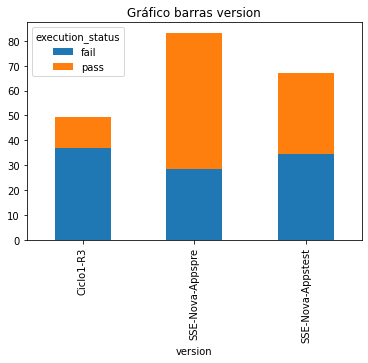

In [84]:
max_graph(top5,'version','execution_status','bar',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

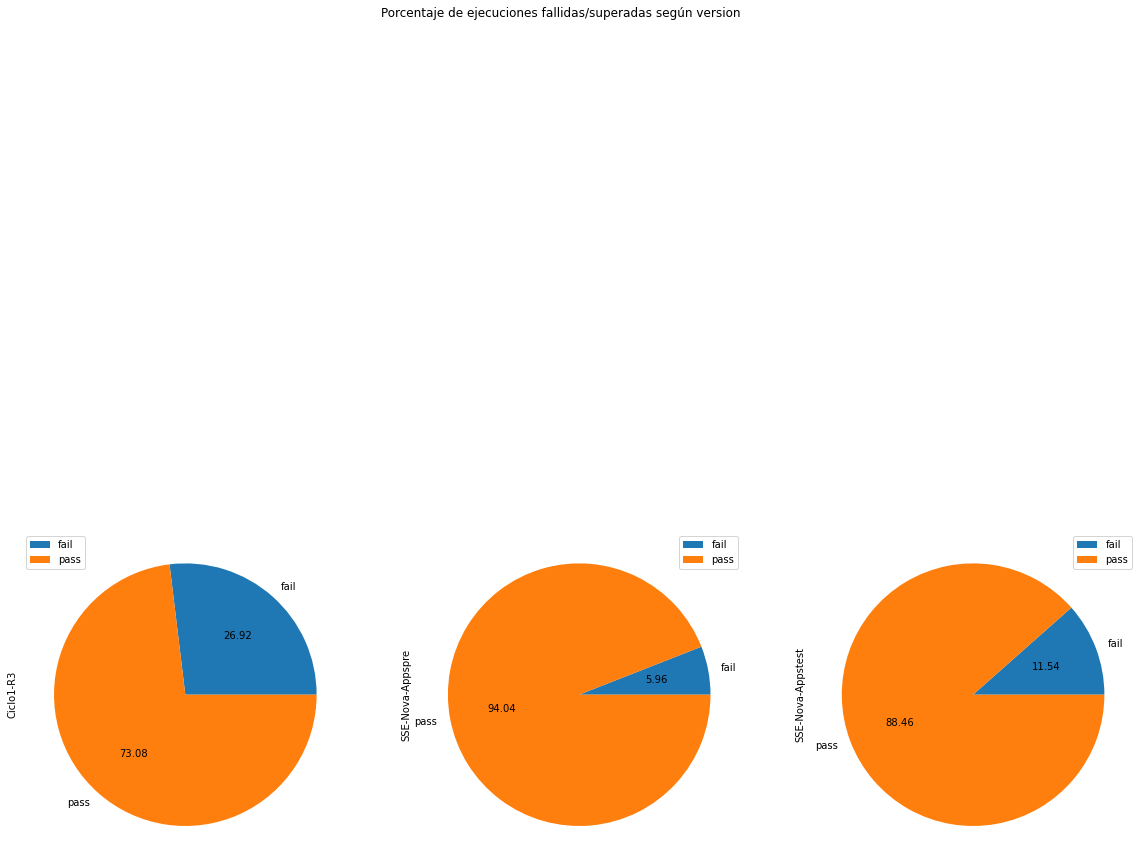

In [85]:
max_graph(top5,'version','execution_status','',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

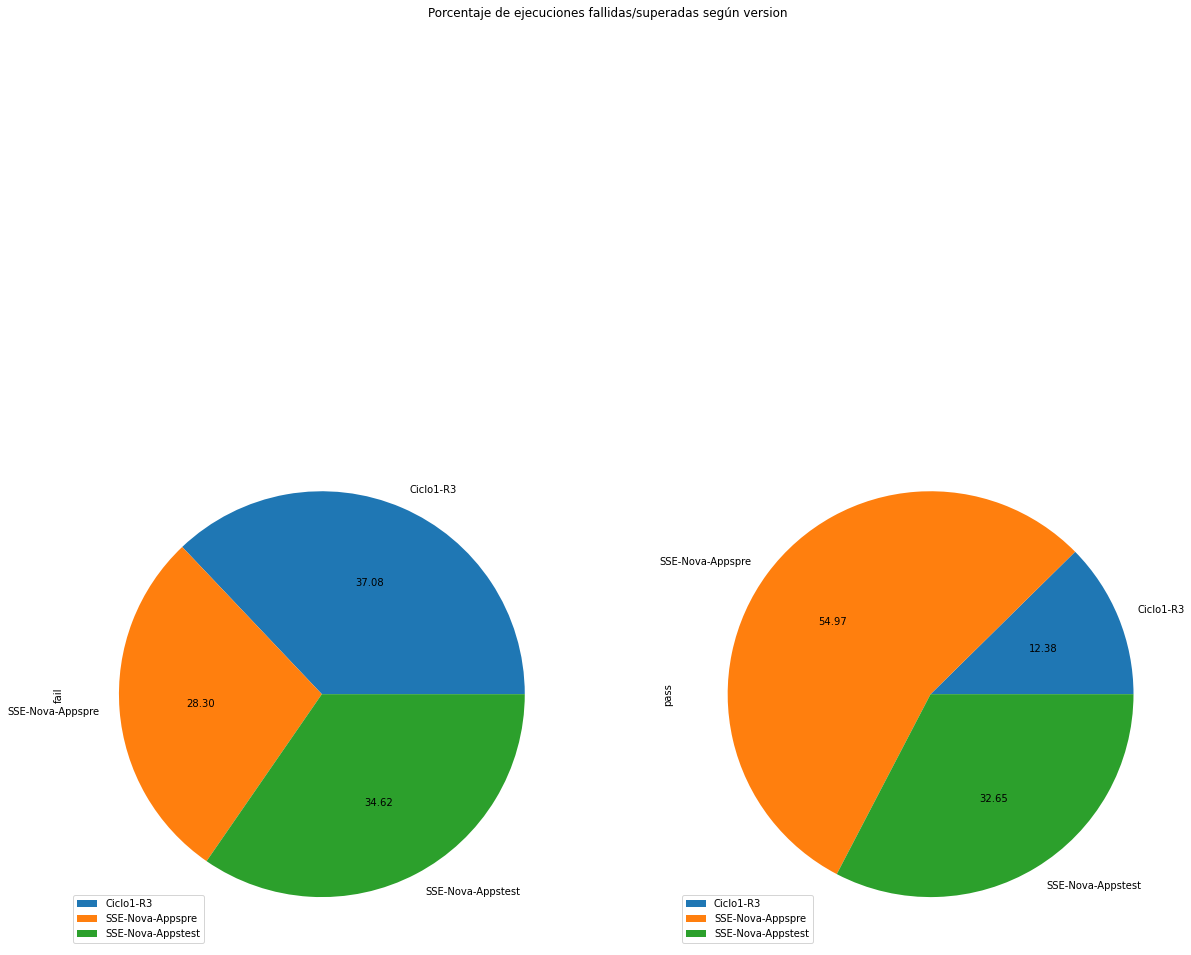

In [86]:
max_graph(top5,'version','execution_status','pie',False)

###### CONCLUSIÓN
Con respecto las ejecuciones de la variable Version, se observa que las versiones Ciclo1-R3 y SSE-Nova-Appstest son las que más veces fallaron, ambas con el 30% aproximadamente. Mientras que SSE-Time-TST es la que mayor cantidad de ejecuciones exitosas tiene, casi el 99% de las veces se ejecutó con éxito

###### Version y errores

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

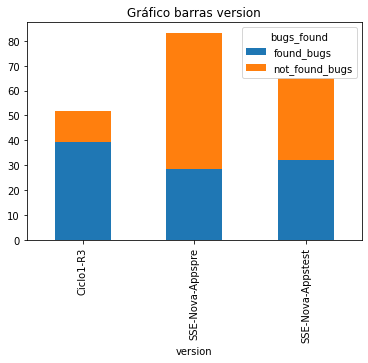

In [87]:
max_graph(top5,'version','bugs_found','bar',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

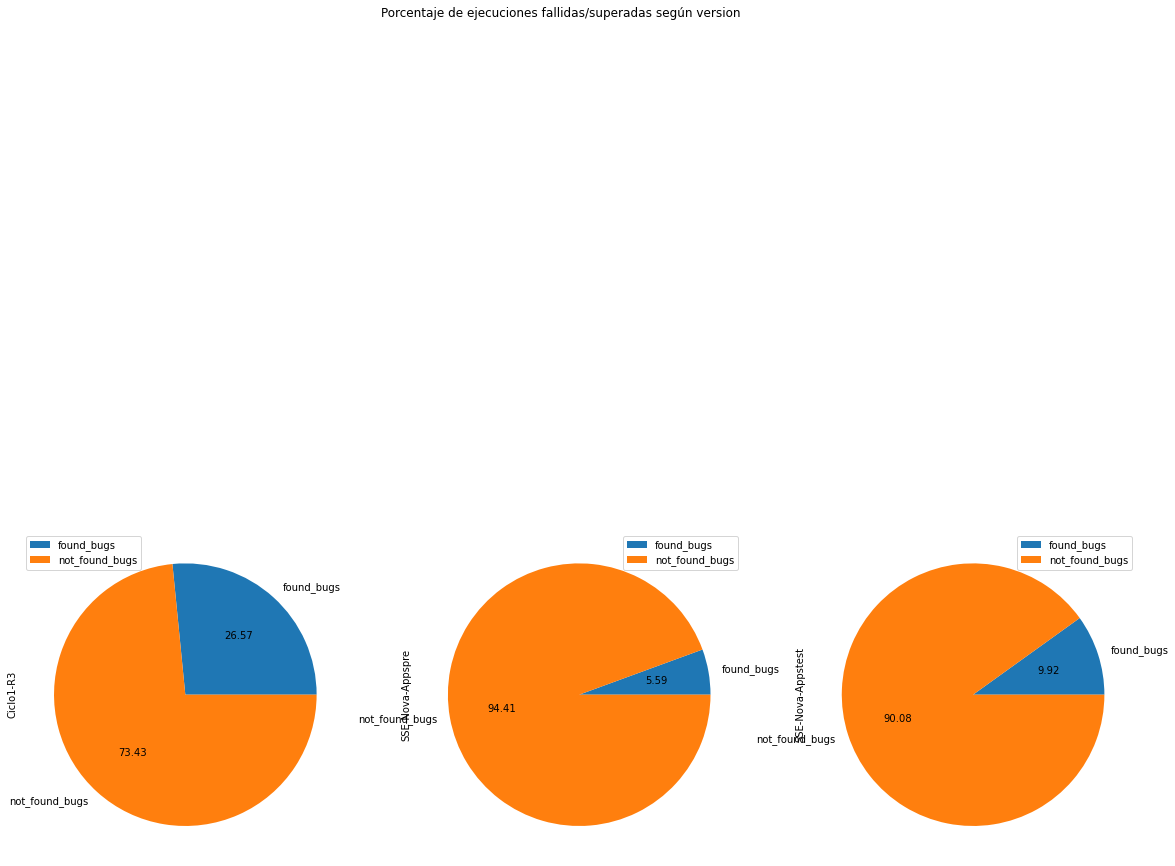

In [88]:
max_graph(top5,'version','bugs_found','',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

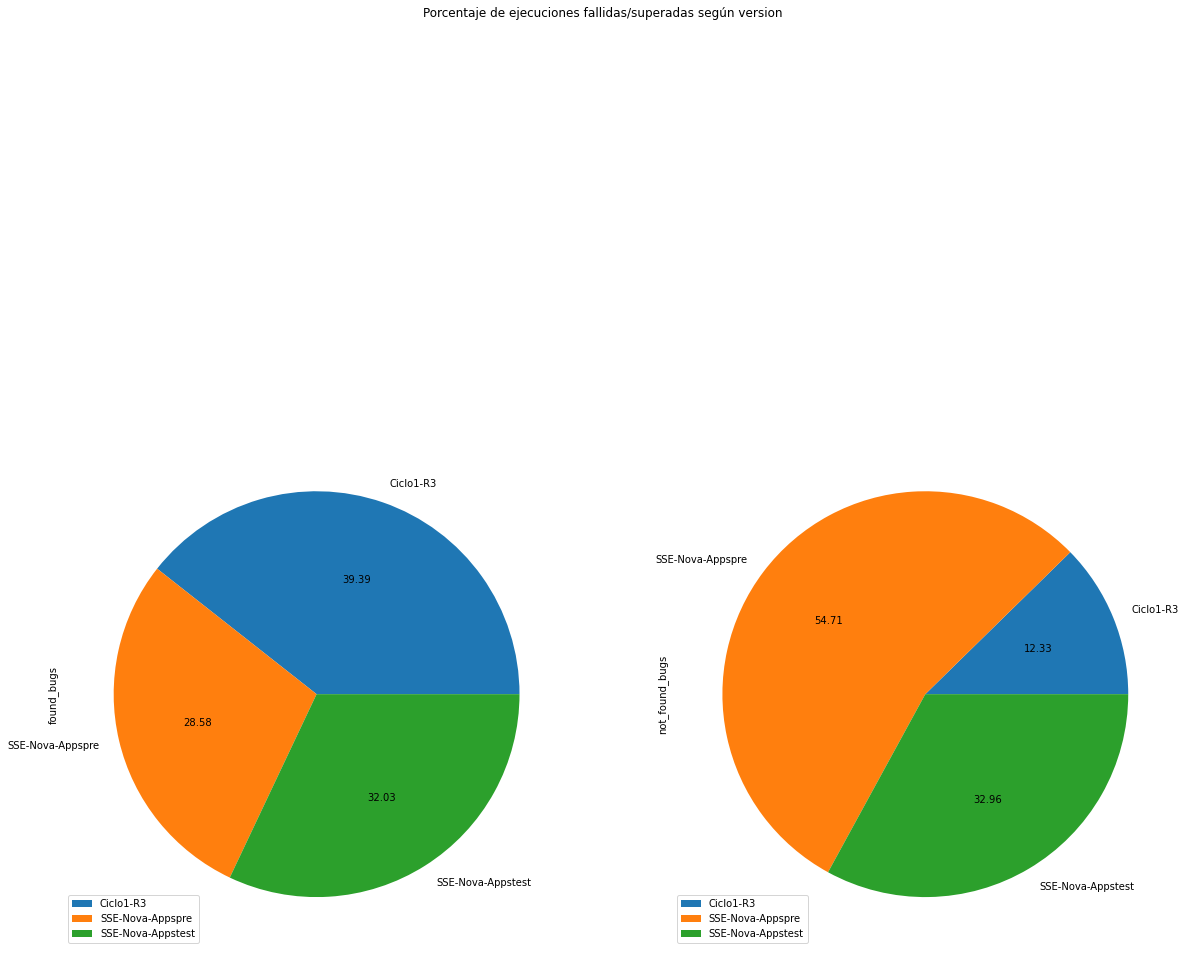

In [89]:
max_graph(top5,'version','bugs_found','pie',False)

###### CONCLUSIÓN
Con respecto los errores de la variable Version, se observa que tanto para Ciclo1-R3 y SSE-Nova-Appstest se encontraron errores en porcentaje mayor que el resto de las variables, lo que coincide con las ejecuciones fallidas.

#### Análisis variable Executed_by (usuario que ejecuta)

In [90]:
# Tabla de contigencia executed_by/execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['executed_by'],margins=True )

executed_by       Alamo Lasso Edgar Nicolas  Allasino Mariano  \
execution_status                                                
fail                                      7                93   
pass                                    282               406   
All                                     289               499   

executed_by       Amadio Curiotti Alejandra Ida  Apaza Oscar Leonardo  \
execution_status                                                        
fail                                          7                   121   
pass                                         45                   973   
All                                          52                  1094   

executed_by       Ardusso Fabricio  Arnaude Juan Rodolfo  \
execution_status                                           
fail                           106                     6   
pass                           273                   337   
All                            379                   343   

executed_by       Ascanio Inciarte Osman Enrique  Audizio Ayelen  \
execution_status                                                   
fail                                          60               0   
pass                                         838               4   
All                                          898               4   

executed_by       Baez Sergio Adrian  Banovsky Marcos  ...  Soto Sergio  \
execution_status                                       ...                
fail                              46                3  ...           81   
pass                             214               91  ...          164   
All                              260               94  ...          245   

executed_by       Spahn Andres Angel  Storani Gianfranco  Tomassi Juan Pablo  \
execution_status                                                               
fail                             102                   1                   1   
pass                             190                   9                   7   
All                              292                  10                   8   

executed_by       Torres Denis  Wenger Braian Nicolas  Woloncewicz Marilina  \
execution_status                                                              
fail                         1                      0                    91   
pass                       300                      3                  3487   
All                        301                      3                  3578   

executed_by       Yschuk Nicolas  Zabinski Silvina    All  
execution_status                                           
fail                          43                29   5016  
pass                         246                83  40040  
All                          289               112  45056  

[3 rows x 105 columns]

In [91]:
# Tabla de contigencia executed_by/execution_status en porcentajes relativos total
pd.crosstab(index=data['execution_status'],
            columns =data['executed_by'],margins=True).apply(lambda r: r/len(data)*100,
                                                         axis=1)

executed_by       Alamo Lasso Edgar Nicolas  Allasino Mariano  \
execution_status                                                
fail                               0.015536          0.206410   
pass                               0.625888          0.901101   
All                                0.641424          1.107511   

executed_by       Amadio Curiotti Alejandra Ida  Apaza Oscar Leonardo  \
execution_status                                                        
fail                                   0.015536              0.268555   
pass                                   0.099876              2.159535   
All                                    0.115412              2.428089   

executed_by       Ardusso Fabricio  Arnaude Juan Rodolfo  \
execution_status                                           
fail                      0.235263              0.013317   
pass                      0.605913              0.747958   
All                       0.841175              0.761275   

executed_by       Ascanio Inciarte Osman Enrique  Audizio Ayelen  \
execution_status                                                   
fail                                    0.133168        0.000000   
pass                                    1.859908        0.008878   
All                                     1.993075        0.008878   

executed_by       Baez Sergio Adrian  Banovsky Marcos  ...  Soto Sergio  \
execution_status                                       ...                
fail                        0.102095         0.006658  ...     0.179776   
pass                        0.474964         0.201971  ...     0.363991   
All                         0.577060         0.208629  ...     0.543768   

executed_by       Spahn Andres Angel  Storani Gianfranco  Tomassi Juan Pablo  \
execution_status                                                               
fail                        0.226385            0.002219            0.002219   
pass                        0.421697            0.019975            0.015536   
All                         0.648082            0.022195            0.017756   

executed_by       Torres Denis  Wenger Braian Nicolas  Woloncewicz Marilina  \
execution_status                                                              
fail                  0.002219               0.000000              0.201971   
pass                  0.665838               0.006658              7.739258   
All                   0.668058               0.006658              7.941229   

executed_by       Yschuk Nicolas  Zabinski Silvina         All  
execution_status                                                
fail                    0.095437          0.064364   11.132812  
pass                    0.545987          0.184215   88.867188  
All                     0.641424          0.248580  100.000000  

[3 rows x 105 columns]

In [92]:
# Tabla de contigencia executed_by/status en porcentajes relativos según execution_status
pd.crosstab(index=data['execution_status'],
            columns =data['executed_by'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

executed_by       Alamo Lasso Edgar Nicolas  Allasino Mariano  \
execution_status                                                
fail                               2.422145         18.637275   
pass                              97.577855         81.362725   

executed_by       Amadio Curiotti Alejandra Ida  Apaza Oscar Leonardo  \
execution_status                                                        
fail                                  13.461538             11.060329   
pass                                  86.538462             88.939671   

executed_by       Ardusso Fabricio  Arnaude Juan Rodolfo  \
execution_status                                           
fail                     27.968338              1.749271   
pass                     72.031662             98.250729   

executed_by       Ascanio Inciarte Osman Enrique  Audizio Ayelen  \
execution_status                                                   
fail                                    6.681514             0.0   
pass                                   93.318486           100.0   

executed_by       Baez Sergio Adrian  Banovsky Marcos  ...  \
execution_status                                       ...   
fail                       17.692308         3.191489  ...   
pass                       82.307692        96.808511  ...   

executed_by       Sola Daniela Andrea  Soto Sergio  Spahn Andres Angel  \
execution_status                                                         
fail                        33.193277    33.061224           34.931507   
pass                        66.806723    66.938776           65.068493   

executed_by       Storani Gianfranco  Tomassi Juan Pablo  Torres Denis  \
execution_status                                                         
fail                            10.0                12.5      0.332226   
pass                            90.0                87.5     99.667774   

executed_by       Wenger Braian Nicolas  Woloncewicz Marilina  Yschuk Nicolas  \
execution_status                                                                
fail                                0.0               2.54332       14.878893   
pass                              100.0              97.45668       85.121107   

executed_by       Zabinski Silvina  
execution_status                    
fail                     25.892857  
pass                     74.107143  

[2 rows x 104 columns]

In [93]:
newdata_executeby = new_data('executed_by',data)

In [94]:
top_values('executed_by',newdata_executeby,5)

                      execution_status  bugs_found
executed_by                                       
Gomez Daniela                     5255        5255
Woloncewicz Marilina              3578        3578
Epelbaum Adriana                  1874        1874
Manzo Jose                        1845        1845
Moreno Agostina                   1653        1653


In [95]:
top5 = newdata_executeby.loc[(newdata_executeby['executed_by'] == 'Gomez Daniela') 
                         | (newdata_executeby['executed_by'] == 'Woloncewicz Marilina ') 
                         | (newdata_executeby['executed_by'] == 'Epelbaum Adriana') 
                         | (newdata_executeby['executed_by'] == 'Manzo Jose')
                         | (newdata_executeby['executed_by'] == 'Moreno Agostina')] 

top5

executed_by execution_status      bugs_found
1      Epelbaum Adriana             fail      found_bugs
2      Epelbaum Adriana             pass  not_found_bugs
3      Epelbaum Adriana             pass  not_found_bugs
15     Epelbaum Adriana             pass  not_found_bugs
16     Epelbaum Adriana             pass  not_found_bugs
...                 ...              ...             ...
44938        Manzo Jose             pass  not_found_bugs
44939        Manzo Jose             pass  not_found_bugs
44943        Manzo Jose             pass  not_found_bugs
44944        Manzo Jose             pass  not_found_bugs
44950        Manzo Jose             pass  not_found_bugs

[10627 rows x 3 columns]

In [96]:
# Tabla de contigencia cycle_name/status en porcentajes relativos según execution_status
pd.crosstab(index=top5['execution_status'],
            columns =top5['executed_by'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

executed_by       Epelbaum Adriana  Gomez Daniela  Manzo Jose  Moreno Agostina
execution_status                                                              
fail                      7.577375       0.608944   17.886179        33.030853
pass                     92.422625      99.391056   82.113821        66.969147

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

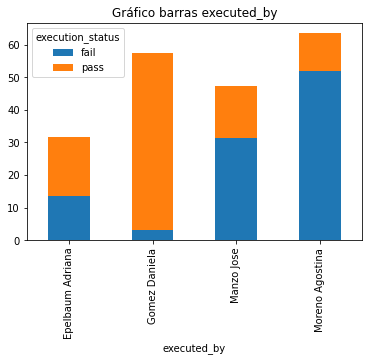

In [97]:
max_graph(top5,'executed_by','execution_status','bar',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

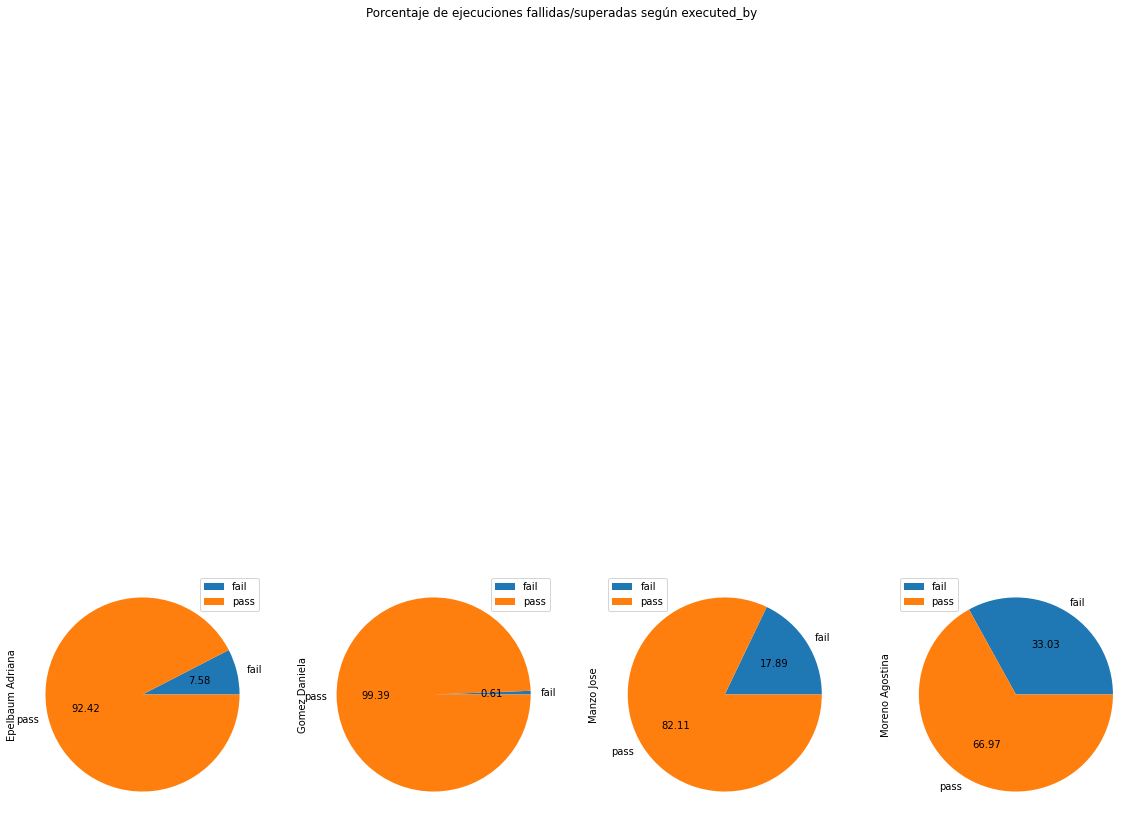

In [98]:
max_graph(top5,'executed_by','execution_status','',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

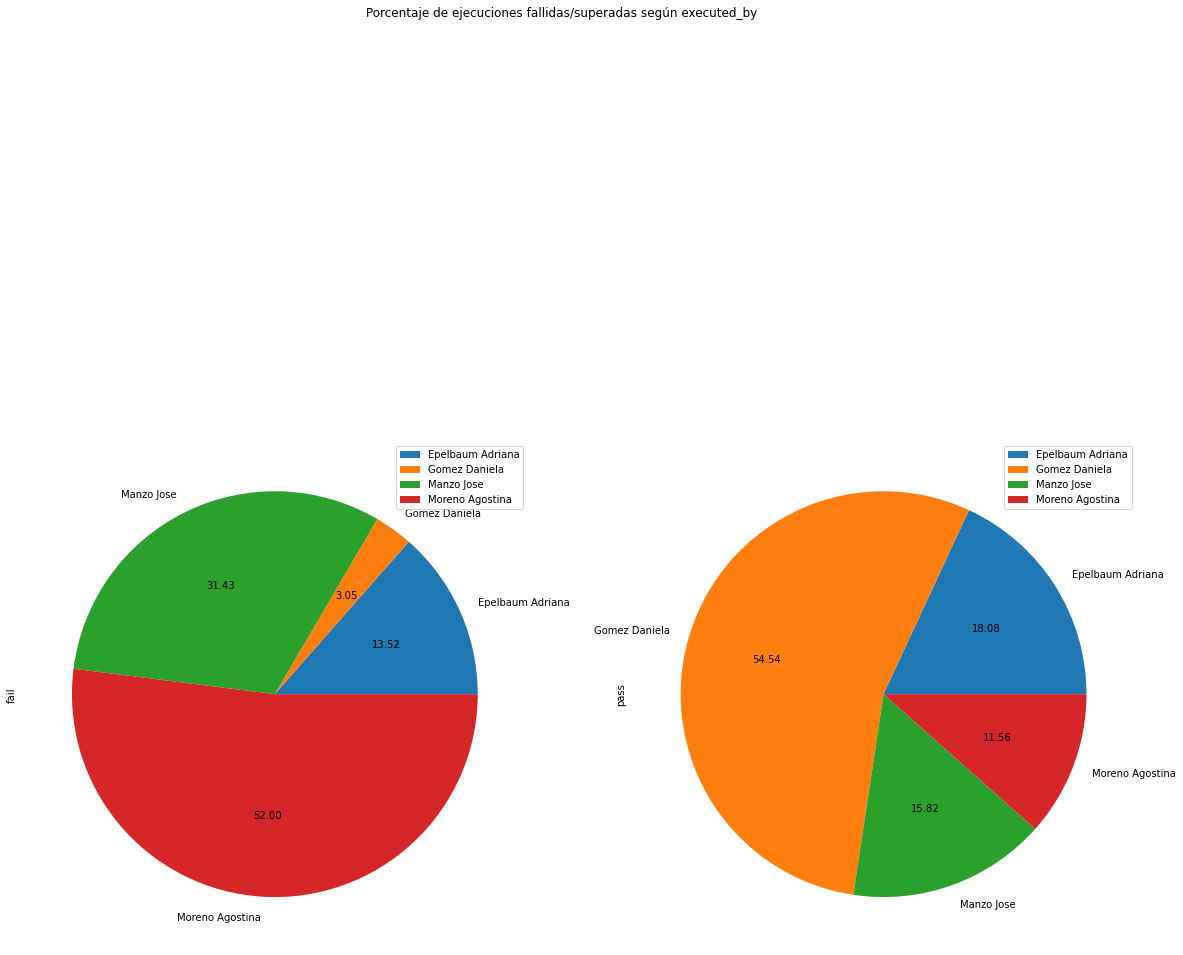

In [99]:
max_graph(top5,'executed_by','execution_status','pie',False)

###### CONCLUSIÓN
Con respecto al tester que ejecuta, se observa que Moreno Agostina tiene el mayor porcentaje de ejecuciones fallidas, más del 50% de las veces la ejecución falla. Mientras que Gomez Daniela ejecuta más del 50% de casos exitosos.

##### Bugs encontrados por usuario

In [100]:
# Tabla de contigencia usuario/errores encontrados
pd.crosstab(index=data['bugs_found'],
            columns =data['executed_by'],margins=True )

executed_by     Alamo Lasso Edgar Nicolas  Allasino Mariano  \
bugs_found                                                    
found_bugs                              4                93   
not_found_bugs                        285               406   
All                                   289               499   

executed_by     Amadio Curiotti Alejandra Ida  Apaza Oscar Leonardo  \
bugs_found                                                            
found_bugs                                  7                   119   
not_found_bugs                             45                   975   
All                                        52                  1094   

executed_by     Ardusso Fabricio  Arnaude Juan Rodolfo  \
bugs_found                                               
found_bugs                   106                     6   
not_found_bugs               273                   337   
All                          379                   343   

executed_by     Ascanio Inciarte Osman Enrique  Audizio Ayelen  \
bugs_found                                                       
found_bugs                                  59               0   
not_found_bugs                             839               4   
All                                        898               4   

executed_by     Baez Sergio Adrian  Banovsky Marcos  ...  Soto Sergio  \
bugs_found                                           ...                
found_bugs                      46                3  ...           81   
not_found_bugs                 214               91  ...          164   
All                            260               94  ...          245   

executed_by     Spahn Andres Angel  Storani Gianfranco  Tomassi Juan Pablo  \
bugs_found                                                                   
found_bugs                     100                   1                   1   
not_found_bugs                 192                   9                   7   
All                            292                  10                   8   

executed_by     Torres Denis  Wenger Braian Nicolas  Woloncewicz Marilina  \
bugs_found                                                                  
found_bugs                 1                      0                    88   
not_found_bugs           300                      3                  3490   
All                      301                      3                  3578   

executed_by     Yschuk Nicolas  Zabinski Silvina    All  
bugs_found                                               
found_bugs                  45                29   4712  
not_found_bugs             244                83  40344  
All                        289               112  45056  

[3 rows x 105 columns]

In [101]:
# Tabla de contigencia usuario/errores encontrados en porcentajes relativos total
pd.crosstab(index=data['bugs_found'],
            columns =data['executed_by'],margins=True).apply(lambda r: r/len(data)*100,
                                                         axis=1)

executed_by     Alamo Lasso Edgar Nicolas  Allasino Mariano  \
bugs_found                                                    
found_bugs                       0.008878          0.206410   
not_found_bugs                   0.632546          0.901101   
All                              0.641424          1.107511   

executed_by     Amadio Curiotti Alejandra Ida  Apaza Oscar Leonardo  \
bugs_found                                                            
found_bugs                           0.015536              0.264116   
not_found_bugs                       0.099876              2.163974   
All                                  0.115412              2.428089   

executed_by     Ardusso Fabricio  Arnaude Juan Rodolfo  \
bugs_found                                               
found_bugs              0.235263              0.013317   
not_found_bugs          0.605913              0.747958   
All                     0.841175              0.761275   

executed_by     Ascanio Inciarte Osman Enrique  Audizio Ayelen  \
bugs_found                                                       
found_bugs                            0.130948        0.000000   
not_found_bugs                        1.862127        0.008878   
All                                   1.993075        0.008878   

executed_by     Baez Sergio Adrian  Banovsky Marcos  ...  Soto Sergio  \
bugs_found                                           ...                
found_bugs                0.102095         0.006658  ...     0.179776   
not_found_bugs            0.474964         0.201971  ...     0.363991   
All                       0.577060         0.208629  ...     0.543768   

executed_by     Spahn Andres Angel  Storani Gianfranco  Tomassi Juan Pablo  \
bugs_found                                                                   
found_bugs                0.221946            0.002219            0.002219   
not_found_bugs            0.426136            0.019975            0.015536   
All                       0.648082            0.022195            0.017756   

executed_by     Torres Denis  Wenger Braian Nicolas  Woloncewicz Marilina  \
bugs_found                                                                  
found_bugs          0.002219               0.000000              0.195312   
not_found_bugs      0.665838               0.006658              7.745916   
All                 0.668058               0.006658              7.941229   

executed_by     Yschuk Nicolas  Zabinski Silvina         All  
bugs_found                                                    
found_bugs            0.099876          0.064364   10.458097  
not_found_bugs        0.541548          0.184215   89.541903  
All                   0.641424          0.248580  100.000000  

[3 rows x 105 columns]

In [102]:
# Tabla de contigencia executed_by/bugs en porcentajes relativos según si encontró o no bugs
pd.crosstab(index=data['bugs_found'],
            columns =data['executed_by'],margins=False).apply(lambda r: r/r.sum()*100,
                                                         axis=0)

executed_by     Alamo Lasso Edgar Nicolas  Allasino Mariano  \
bugs_found                                                    
found_bugs                       1.384083         18.637275   
not_found_bugs                  98.615917         81.362725   

executed_by     Amadio Curiotti Alejandra Ida  Apaza Oscar Leonardo  \
bugs_found                                                            
found_bugs                          13.461538             10.877514   
not_found_bugs                      86.538462             89.122486   

executed_by     Ardusso Fabricio  Arnaude Juan Rodolfo  \
bugs_found                                               
found_bugs             27.968338              1.749271   
not_found_bugs         72.031662             98.250729   

executed_by     Ascanio Inciarte Osman Enrique  Audizio Ayelen  \
bugs_found                                                       
found_bugs                            6.570156             0.0   
not_found_bugs                       93.429844           100.0   

executed_by     Baez Sergio Adrian  Banovsky Marcos  ...  Sola Daniela Andrea  \
bugs_found                                           ...                        
found_bugs               17.692308         3.191489  ...            33.193277   
not_found_bugs           82.307692        96.808511  ...            66.806723   

executed_by     Soto Sergio  Spahn Andres Angel  Storani Gianfranco  \
bugs_found                                                            
found_bugs        33.061224           34.246575                10.0   
not_found_bugs    66.938776           65.753425                90.0   

executed_by     Tomassi Juan Pablo  Torres Denis  Wenger Braian Nicolas  \
bugs_found                                                                
found_bugs                    12.5      0.332226                    0.0   
not_found_bugs                87.5     99.667774                  100.0   

executed_by     Woloncewicz Marilina  Yschuk Nicolas  Zabinski Silvina  
bugs_found                                                              
found_bugs                  2.459475       15.570934         25.892857  
not_found_bugs             97.540525       84.429066         74.107143  

[2 rows x 104 columns]

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

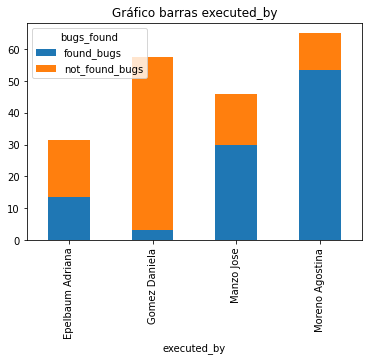

In [103]:
max_graph(top5,'executed_by','bugs_found','bar',False)

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

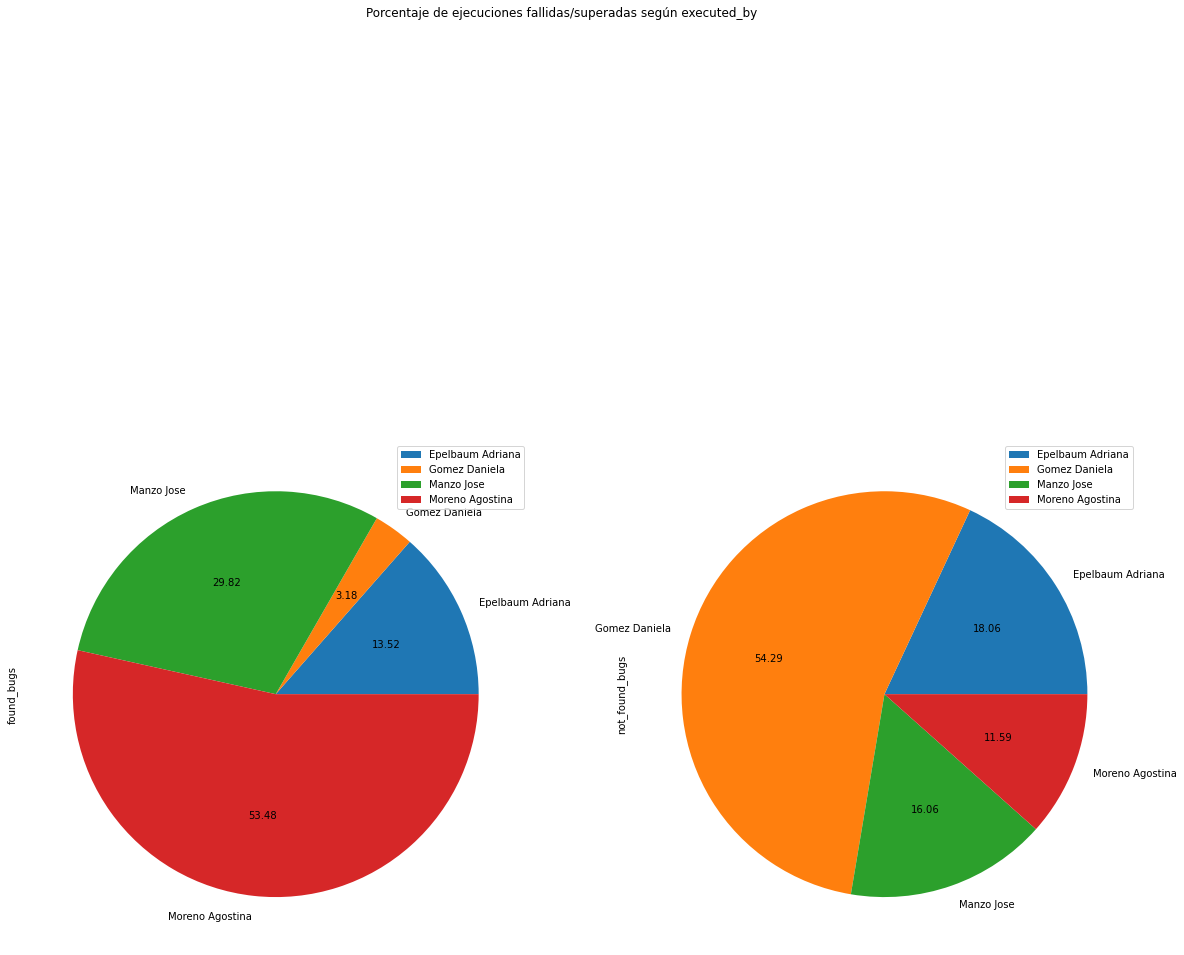

In [104]:
max_graph(top5,'executed_by','bugs_found','pie',False)

###### CONCLUSIÓN
Con respecto a los errores encontrados por los testers, se observa que Moreno Agostina tiene el mayor porcentaje de errores encontrados, coincidente con la cantidad de ejecuciones fallidas; seguido por Manzo José. Mientras que Gomez Daniela es la que menos errores encontró en sus ejecuciones

##### Porcentaje de ejecuciones totales según  usuario

<AxesSubplot:title={'center':'Porcentaje de ejecuciones según usuario'}, ylabel='executed_by'>

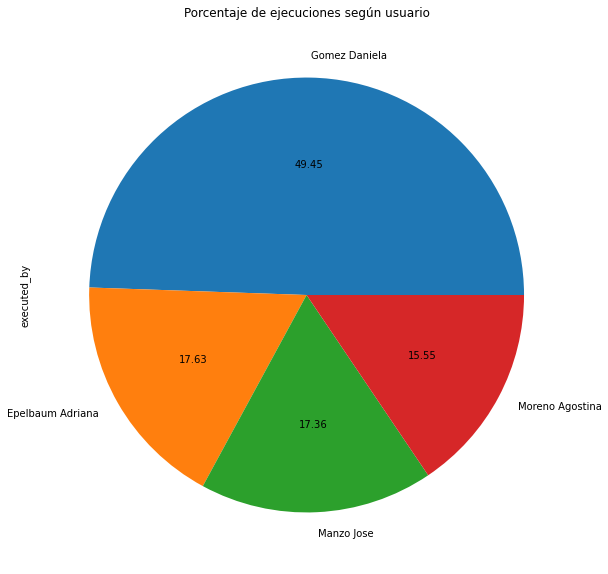

In [105]:
#Construccion grafico
top5["executed_by"].value_counts().plot(kind='pie',
                                     #colors = ["tomato","violet","yellowgreen","turquoise","teal"],
                                    autopct="%.2f",
                                     fontsize=10,
                                     figsize=(10,10),
                                     title = 'Porcentaje de ejecuciones según usuario')

###### CONCLUSIÓN
Gomez Daniela es el tester que más ejecuciones realizó en total, y la mayoría de ellas fueron casos exitosos. Mientras que Moreno Agostina es la que menor cantidad de ejecuciones realizó, y a su vez la de mayor porcentaje de casos no superados